<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Цель проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Описание-используемых-алгоритмов-и-метрик" data-toc-modified-id="Описание-используемых-алгоритмов-и-метрик-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Описание используемых алгоритмов и метрик</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li></ul></li><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Пространство-признаков-для-исследования" data-toc-modified-id="Пространство-признаков-для-исследования-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Пространство признаков для исследования</a></span><ul class="toc-item"><li><span><a href="#Модель-без-учета-дисбаланса" data-toc-modified-id="Модель-без-учета-дисбаланса-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Модель без учета дисбаланса</a></span></li></ul></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>RandomForestClassifier</a></span><ul class="toc-item"><li><span><a href="#Важность-признаков-в-случайном-лесе" data-toc-modified-id="Важность-признаков-в-случайном-лесе-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Важность признаков в случайном лесе</a></span></li></ul></li><li><span><a href="#SVС" data-toc-modified-id="SVС-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>SVС</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li></ul></div>

**Сразу установлю дополнительные библиотеки:**


In [1]:
! pip install phik


In [2]:
! pip install shap


In [3]:
! pip install imblearn

In [4]:
# Не уверен, уствновлен ли он на хабе
# ! pip install catboost

# Отток клиентов

## Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 



## Цель проекта

На основании исторических данных, нужно **спрогнозировать**, уйдёт клиент из банка в ближайшее время или нет.

Необходимо построить модель с предельно большим значением F1-меры. Преодолеть f1 метрику = 0.59. Дополнительно исследуя ROC-AUC

## Описание данных


**Признаки**
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата


**Целевой признак**
* Exited — факт ухода клиента

## Описание используемых алгоритмов и метрик

В данном проекте **в качестве основных метрик** будем использовать:
* f1_score - среднее гармоническое precision и recall
* ROC_AUC - площадь [0, 1] под roc_curve


В данной работе построим следующие модели:
* Дерево решений без учета баланса
* Логистическая регрессия
* KNN
* Дерево решений
* Случайный лес
* SVC
* CatBoostClassifier 

# Важное замечание

Добавим константу для Random State

In [5]:
RS_CONST = 42

# Подключение и установка библиотек

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.metrics import roc_auc_score, RocCurveDisplay, f1_score, confusion_matrix
from catboost import CatBoostClassifier
from catboost import cv, Pool
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer # попробовать заполнить пропуски
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import FunctionTransformer # для своих функций в pipeline
pd.options.mode.chained_assignment = None
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
#from sklearn.metrics import plot_roc_curve
import shap
shap.initjs()

plt.style.use('fivethirtyeight') # выбор стиля 

# Предобработка данных

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 

**Обработка пропусков, выбросов и т.д., будут производиться а этапе моделирования, используя Pipeline для предотвращения утечки данных!**

### Загрузка данных

In [7]:
try:
    data = pd.read_csv('Churn.csv')

except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [8]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 2.6 MB


Видим, что переменные названы в стиле CamelCase, **переделаем имена в Snake_case**

In [9]:
data = data.rename({'RowNumber' : 'row_number', 'CustomerId' : 'customer_id', 'Surname' : 'surname',
              'CreditScore' : 'credit_score', 'Geography' : 'geography', 'Gender' : 'gender',
              'Age' : 'age', 'Tenure' : 'tenure', 'Balance' : 'balance',
              'NumOfProducts' : 'num_of_products', 'HasCrCard' : 'has_cr_card',
              'IsActiveMember' : 'is_active_member', 'EstimatedSalary' : 'estimated_salary', 'Exited' : 'exited'}, axis=1)

In [10]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 2.6 MB


In [11]:
def clean_memory(data):
    data['row_number'] = data['row_number'].astype('int16')
    data['customer_id'] = data['customer_id'].astype('int64')
    data['credit_score'] = data['credit_score'].astype('int16')
    data['age'] = data['age'].astype('int8')
    data['balance'] = data['balance'].astype('int32')
    data['estimated_salary'] = data['estimated_salary'].astype('int32')
    data['num_of_products'] = data['num_of_products'].astype('int8')
    data['has_cr_card'] = data['has_cr_card'].astype('int8')
    data['is_active_member'] = data['is_active_member'].astype('int8')

Применим функцию для освобождения памяти

In [12]:
clean_memory(data)

In [13]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int16  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int16  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int8   
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  int32  
 9   num_of_products   10000 non-null  int8   
 10  has_cr_card       10000 non-null  int8   
 11  is_active_member  10000 non-null  int8   
 12  estimated_salary  10000 non-null  int32  
 13  exited            10000 non-null  int64  
dtypes: float64(1), int16(2), int32(2), int64(2), int8(4), object(3)
memory usage: 2.2 MB


**Освободили 0.4 MB**

# Разбиваем на обучающую и тестовую выборку

In [14]:
# разбивка такая, поскольку буду пользовать стратегией кросс-валидации


train, test = train_test_split(data, test_size=0.2, random_state=RS_CONST, stratify=data['exited'])

**Внимание! Заполнение пропусков и предобработку в целом, я делаю только на train. Test для меня не существует.**

# EDA

Рассмотрим общую информацию на train:

In [15]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2151 to 6206
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        8000 non-null   int16  
 1   customer_id       8000 non-null   int64  
 2   surname           8000 non-null   object 
 3   credit_score      8000 non-null   int16  
 4   geography         8000 non-null   object 
 5   gender            8000 non-null   object 
 6   age               8000 non-null   int8   
 7   tenure            7271 non-null   float64
 8   balance           8000 non-null   int32  
 9   num_of_products   8000 non-null   int8   
 10  has_cr_card       8000 non-null   int8   
 11  is_active_member  8000 non-null   int8   
 12  estimated_salary  8000 non-null   int32  
 13  exited            8000 non-null   int64  
dtypes: float64(1), int16(2), int32(2), int64(2), int8(4), object(3)
memory usage: 1.8 MB


In [16]:
train

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
2151,2152,15588614,Walton,753,France,Male,57,7.0,0,1,1,0,159475,1
8392,8393,15641158,Belcher,739,Germany,Male,32,3.0,102128,1,1,0,63981,1
5006,5007,15750014,Chikere,755,Germany,Female,37,0.0,113865,2,1,1,117396,0
4117,4118,15663964,Pagnotto,561,France,Male,37,5.0,0,2,1,0,83093,0
7182,7183,15573520,Rhodes,692,Germany,Male,49,NaN,110540,2,0,1,107472,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,4556,15733261,Kung,688,Spain,Female,35,6.0,0,1,1,0,25488,1
4644,4645,15714240,Ponomarev,712,Spain,Male,74,NaN,0,2,0,0,151425,0
8942,8943,15709780,Azuka,667,France,Female,37,9.0,71786,2,1,1,67734,0
2935,2936,15689425,Olejuru,687,Spain,Male,35,8.0,100988,2,1,0,22247,0




**Рассмотрим распределение целевой перменной**

<AxesSubplot:xlabel='exited', ylabel='count'>

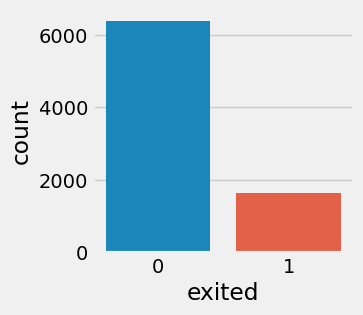

In [17]:
plt.figure(figsize=(3, 3))
sns.countplot(data=train, x=train['exited'])

**Практически 80% принадлежат классу 0, и 20% принадлежат классу 1**

In [18]:
train['exited'].value_counts(normalize=True)

0    0.79625
1    0.20375
Name: exited, dtype: float64

Для борьбы с дисбалансом классов, при построении моделей буду использовать методы undersampling (Timeklinks) и oversampling (ADASYN и SMOTE), а также использовать различный вес для классов в моделях и работать с порогами. Все это будет происходить на этапе работы с моделями.

**Рассмотрим переменные, влияющие на таргет:**

<Figure size 400x400 with 0 Axes>

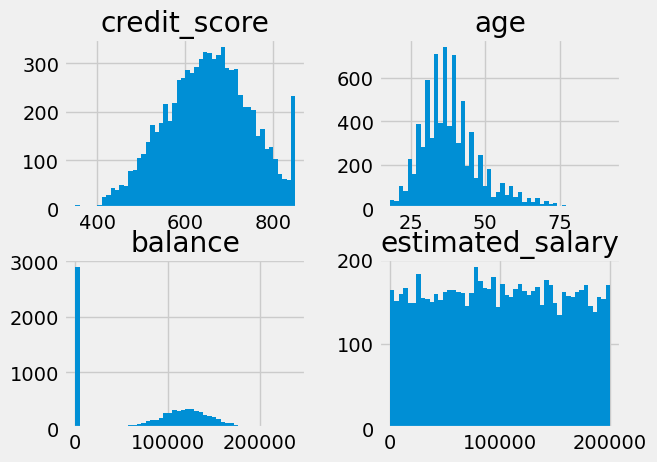

In [19]:
plt.figure(figsize=(4, 4))
train[['credit_score', 'age', 'balance', 'estimated_salary']].hist(bins=50);

**Рассмотрим переменную Balance подробнее**

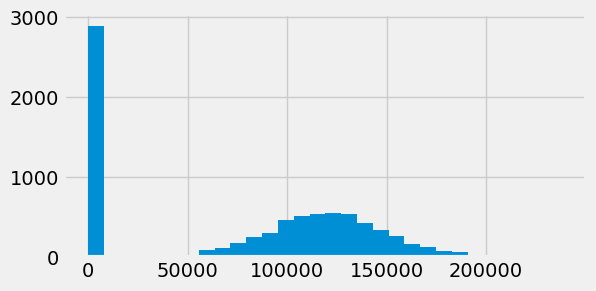

In [20]:
plt.figure(figsize=(6, 3))
train['balance'].hist(bins=30)
plt.xticks(np.arange(min(train['balance']), max(train['balance'])+1, 50000));

**Видим, что порядка 2800 наблюдений имеют balance = 0, остальная часть распрделения напоминает нормальное. Далее рассмотрим подробнее жирный хвост в правой части распределения.**

**Категоризуем переменную balance**

Исходя из такого распределения попробую данные экспериментально **разбить на категории:**
* Баланс 0
* Баланс (3768.689, 107026.023] - Low
* Баланс (107026.023, 131979.947] - Medium
* Баланс (131979.947, ++++] - High


Функция для категоризации balance

In [21]:
def balance_categorize(row):
    balance = row['balance']
    
    try:
        
        if balance == 0:
            return 'На счету 0'

        elif balance >= 3750 and balance <= 107027:
            return 'Low'

        elif balance > 107027 and balance <= 131980:
            return 'Medium'

        elif balance > 131980:
            return 'High'
        
    except:
         
        return 'no_info'
    

Сгруппируем данные:

In [22]:
train.groupby([train.apply(balance_categorize, axis=1)])['exited'].agg(['count', 'mean'])

,count,mean
High,1703,0.230769
Low,1704,0.218310
Medium,1702,0.277321
На счету 0,2891,0.135939


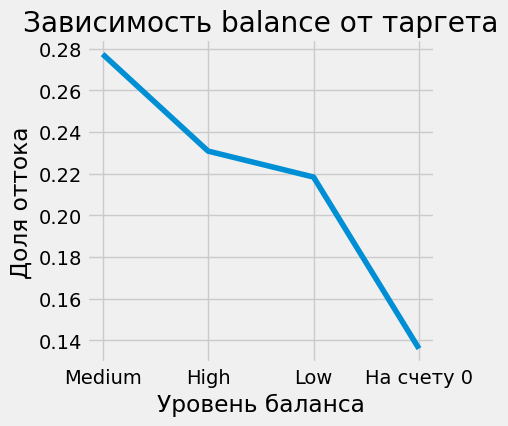

In [23]:
plt.figure(figsize=(4, 4))
train.groupby([train.apply(balance_categorize, axis=1)])['exited'].agg(['count', 'mean'])\
                                .sort_values(by='mean', ascending=False)['mean'].plot()

plt.title('Зависимость balance от таргета')
plt.xlabel('Уровень баланса')
plt.ylabel('Доля оттока');

**Видим, что клиенты с балансом [107027, 131980] (Medium) больше всех подвержены оттоку. Клиенты с 0 балансом меньше всего подвержены оттоку**

Изучим переменную **CreditScore** - кредитный рейтинг

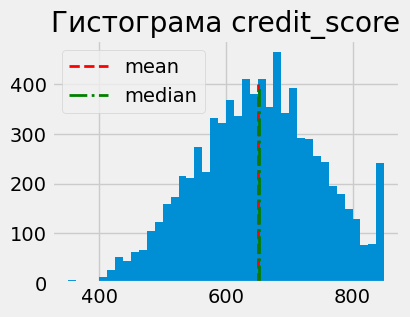

In [24]:
plt.figure(figsize = (4, 3))

train['credit_score'].hist(bins=40)
y = np.linspace(0,  400, 100)
plt.plot([train['credit_score'].mean()]*100, y, label='mean', linestyle='--', linewidth=2, color='r')
plt.plot([train['credit_score'].median()]*100, y, label='median', linestyle='-.', linewidth=2, color='g')
plt.title('Гистограма credit_score')
plt.legend();

**Распределение близко к нормальному, поскольку среднее и медиана совпадают!**

**Разобьем переменную на категории, чтобы построить сводную таблицу:**

In [25]:
pd.qcut(train['credit_score'], 4).value_counts()

(349.999, 584.0]    2022
(717.0, 850.0]      1999
(652.0, 717.0]      1990
(584.0, 652.0]      1989
Name: credit_score, dtype: int64

In [26]:
def сredit_score_categorize(row):
    CreditScore = row['credit_score']
    
    try:
        
        if CreditScore >= 330 and CreditScore <= 584:
            return 'Низкий'

        elif CreditScore > 584 and CreditScore <= 652:
            return 'Средний'

        elif CreditScore > 652 and CreditScore <= 717:
            return 'Высокий'

        elif CreditScore > 717:
            return 'Высший'
        
    except:
         
        return 'no_info'

In [27]:
train.groupby([train.apply(сredit_score_categorize, axis=1)])['exited'].agg(['count', 'mean'])

,count,mean
Высокий,1990,0.181407
Высший,1999,0.200100
Низкий,2022,0.225025
Средний,1989,0.208145


Text(0, 0.5, 'Доля оттока')

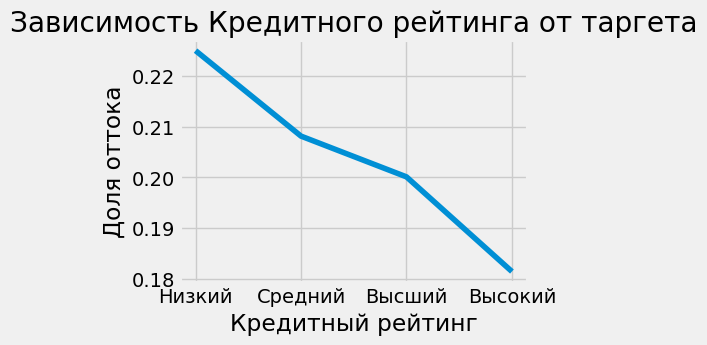

In [28]:
plt.figure(figsize = (4, 3))

train.groupby([train.apply(сredit_score_categorize, axis=1)])['exited'].agg(['count', 'mean'])\
                                .sort_values(by='mean', ascending=False)['mean'].plot()

plt.title('Зависимость Кредитного рейтинга от таргета')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Доля оттока')

**Видим, что отток клиентов больше у клиентов с низким кредитный рейтигом.**

**Также рассмотрим зависимость оттока от количества продуктов num_of_products:**

In [29]:
z = train.groupby(['num_of_products'])['exited'].agg(['count', 'mean']).reset_index()
z

,num_of_products,count,mean
0,1,4071,0.279784
1,2,3672,0.073802
2,3,207,0.821256
3,4,50,1.000000


**Группа 3 и 4 маленькие, по ним объективных выводов не сделать. А вот что касается группы 1 и 2, то видим, что для 1 продукта 27% отток, а вот для 2 продуктов отток уже 7%! Значит, таргет зависит от количества продуктов**

Рассчитаем коэффицент корреляции phik, выявляющий также и нелинейные взаимосвязи

In [30]:
import phik
phik = phik.phik_matrix(train)

interval columns not set, guessing: ['row_number', 'customer_id', 'credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']


The number of unique values of variable surname is large: 2620. Are you sure this is not an interval variable? Analysis for pairs of variables including surname can be slow.


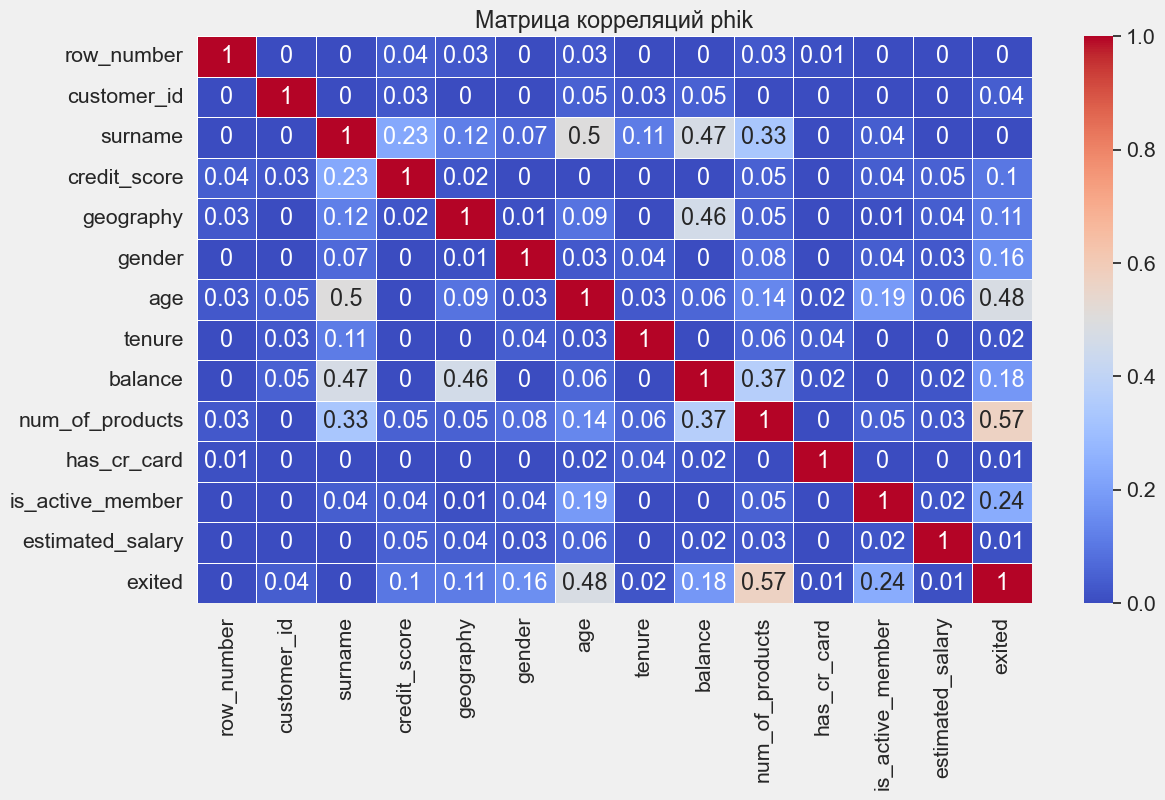

In [31]:
plt.figure(figsize=(12, 7))
sns.set(font_scale=1.4)
phik = np.round(phik, 2)

sns.heatmap(phik, annot=True, linewidths=0.5,cmap='coolwarm')
plt.title('Матрица корреляций phik');

Рассмотрим подробнее, что по мнению phik, сильнее всего влияет на таргет

In [32]:
phik['exited'].sort_values(ascending=False)

exited              1.00
num_of_products     0.57
age                 0.48
is_active_member    0.24
balance             0.18
gender              0.16
geography           0.11
credit_score        0.10
customer_id         0.04
tenure              0.02
has_cr_card         0.01
estimated_salary    0.01
row_number          0.00
surname             0.00
Name: exited, dtype: float64

Phik показал, что **наибольшее влияние на таргет** оказывает переменная **num_of_products, age, is_active_member**, balance, credit_score. Как и заметили раньше, а phik это подтвердил, **переменные row_number и surname не влияют на таргет.**

**Посчитаем корреляции. Видим, что сильной корреляции между переменными 'credit_score', 'age', 'balance', 'estimated_salary', 'exited' нет!**

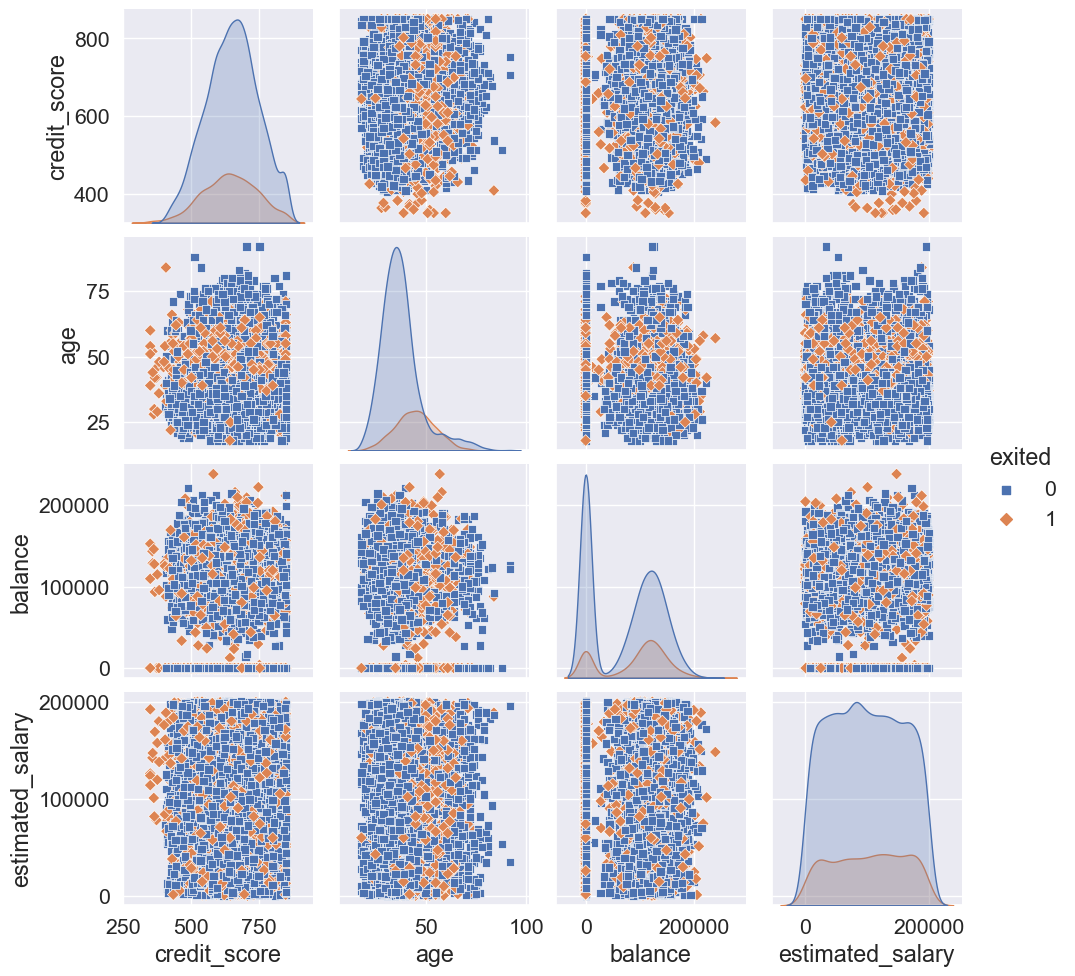

In [33]:
sns.pairplot(train[['credit_score', 'age', 'balance', 'estimated_salary', 'exited']].reset_index(drop=True),
             hue='exited', markers=['s', 'D'])

Рассчитаем матрицу корреляции

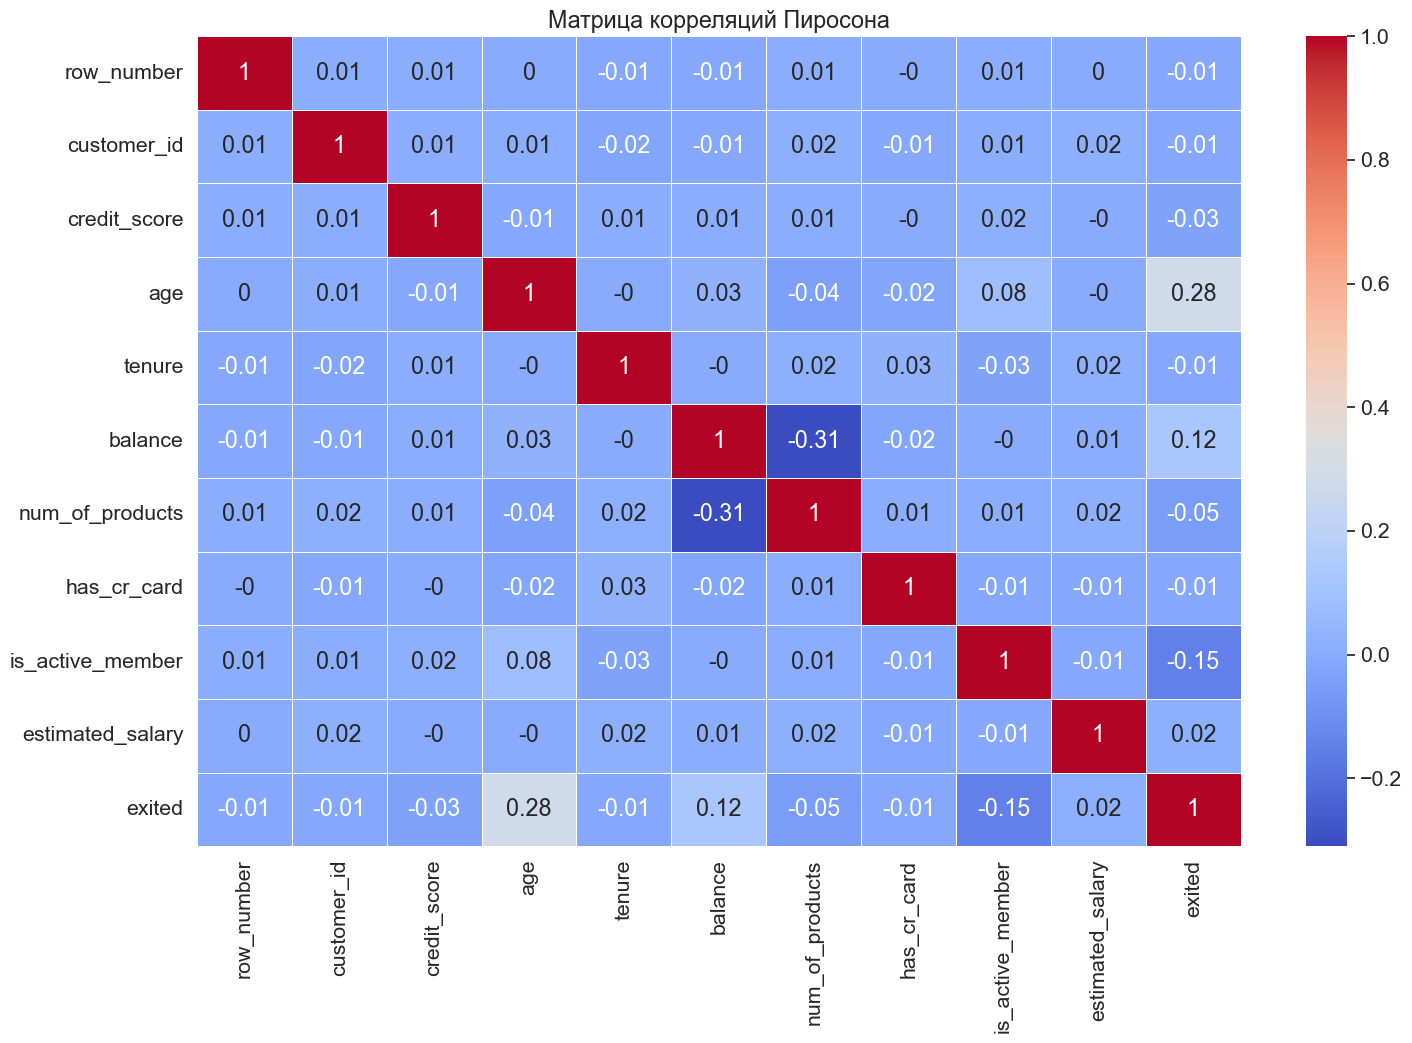

In [34]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.4)
corr_matrix = np.round(train.corr(), 2)

sns.heatmap(corr_matrix, annot=True, linewidths=0.5,cmap='coolwarm')
plt.title('Матрица корреляций Пиросона');

**Вывод по EDA:**
* Дисбаланс классов. Практически 80% принадлежат классу 0, и 20% принадлежат классу 1;
* row_number для исследования использовать не будем- фактически это индекс, но не с 0;
* surname для исследования использовать не будем;
* Phik показал, что наибольшее влияние на таргет оказывает переменная num_of_products, age, is_active_member, balance, credit_score;
* Для переменной num_of_products для 1 продукта 27% отток, а вот для 2 продуктов отток уже 7%;
* Для переменной credit_score отток клиентов больше у клиентов с низким кредитный рейтигом;
* Сильной корреляции между признаками нет, **проблема мультиколлинеарности отсутствует**



## Пропуски

**Визуализируем пропуски. Видим, что они есть в переменной tenure. На этапе моделирования мы ее заполним.**

<AxesSubplot:>

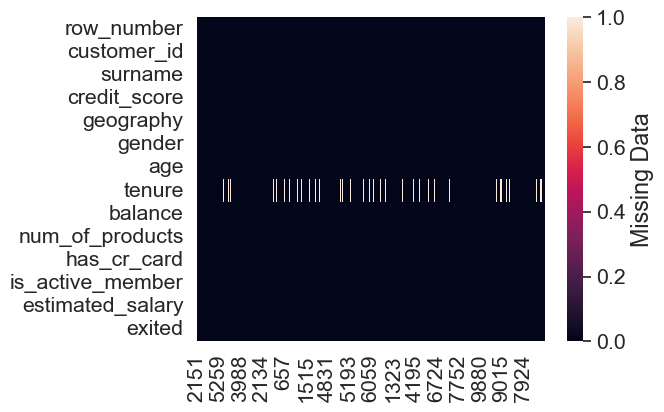

In [35]:
plt.figure(figsize=(5,4))

sns.heatmap(train.isna().transpose(), cbar_kws={'label': 'Missing Data'})

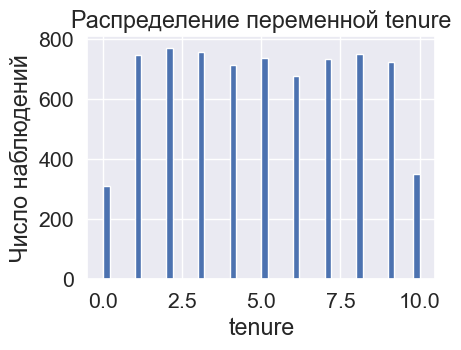

In [36]:
plt.figure(figsize=(4,3))

train['tenure'].hist(bins=50)
plt.title('Распределение переменной tenure')
plt.xlabel('tenure')
plt.ylabel('Число наблюдений');

## Пространство признаков для исследования

**В EDA мы выяснили, что переменные row_number, surname и customer_id не влияют на таргет. Не будем брать их в расчет:**

In [37]:
X = ['credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary']

target = ['exited']

**Также сразу выделим количественные и категориальные признаки для дальнейшей предобработки:**

In [38]:
numeric_features = ['credit_score', 'age',
                    'tenure', 'balance',
                    'estimated_salary',
                    'num_of_products']

categorical_features = ['geography', 'gender',
                        'has_cr_card', 'is_active_member']

Теперь в процессе обучения будем работать с этим пространством признаков

# Pipeline

На этапе EDA мы выяснили какие переменные будет использовать для обучения, на данном этапе построю следующий pipeline:
    
* Удаление дубликатов
* Удаление выбросов в переменной Balance
* Масштабирование данных **для числовых**
* Обработка пропусков (KNNImputer)
* **Для категориальных** переменных - кодирование
* under/over sampling
* Создание модели    

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
        
Для первых двух шагов мне необходимо **реализовать собственные трансформеры:**

Напишу свой класс трансформер для поиска и удаления дубликатов в наборе данных

In [39]:
# Траснформер удаления дубликатов

class Drop_duplicates_Transform(BaseEstimator, TransformerMixin):
    
    __FEATURE_SEARCH__DUPL = ['credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary']
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        X_copy = X.copy()
        self.indexes = X_copy.drop_duplicates(subset=Drop_duplicates_Transform.__FEATURE_SEARCH__DUPL).index
        return pd.concat([X_copy.loc[self.indexes], y.loc[self.indexes]], axis=1)
    

    def fit_transform(self, X, y):
        X_copy = X.copy()
        self.indexes = X_copy.drop_duplicates(subset=Drop_duplicates_Transform.__FEATURE_SEARCH__DUPL).index
        return pd.concat([X_copy.loc[self.indexes], y.loc[self.indexes]], axis=1)


    def transform(self, X, y=None):
        return pd.concat([X, y], axis=1)



Напишу свой класс трансформер для поиска и удаления выбросов в фиче Balance

In [40]:
# Трансформер для удаления выбросов в фиче Balance

class Outlier_feature_Balance_Transform(BaseEstimator, TransformerMixin):
    
    # инициализация силы размаха, по умолчанию полтора межквартильных
    def __init__(self, power):
        self.power = power
        
        
    def fit(self, X, y=None):
        if X.shape[0] == y.shape[0]:
            data = pd.concat([X, y], axis=1)
        else:
            raise ValueError ('Размерности не совпадают')
        

        # расчет межквартильных расстояний    
             # nanpercentile корректно отработает с пропусками
        Q1 = np.nanpercentile(data.query('balance != 0')['balance'], 25.)
        Q3 = np.nanpercentile(data.query('balance != 0')['balance'], 75.)

        cut_off = (Q3 - Q1) * self.power
        upper, lower = Q3 + cut_off, Q1 - cut_off

        final = data.query('balance < @upper & balance > @lower')

         
        return data
    
    
    def fit_transform(self, X, y=None):
        
        if X.shape[0] == y.shape[0]:
            data = pd.concat([X, y], axis=1)
        else:
            raise ValueError ('Размерности не совпадают')
        

        # расчет межквартильных расстояний    
             # nanpercentile корректно отработает с пропусками
        Q1 = np.nanpercentile(data.query('balance != 0')['balance'], 25.)
        Q3 = np.nanpercentile(data.query('balance != 0')['balance'], 75.)

        cut_off = (Q3 - Q1) * self.power
        upper, lower = Q3 + cut_off, Q1 - cut_off

        final = data.query('balance < @upper & balance > @lower')

      
        return data
    
    def transform(self, X, y=None):
        return pd.concat([X, y], axis=1)
        


In [41]:
# своя функция пишется с помощью FunctionTransformer

# своя обработка для каждой фичи через ColumnTransformer 

**Создание Pipeline:**

In [42]:
# масштабирую и заполняю числовые признаки
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('fill_na', KNNImputer())])


# обработка категориальных переменных OHE
categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


pipe = Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                     ('del_outlier_balance', Outlier_feature_Balance_Transform(1.5)),
                     ('preprocessor_feature', preprocessor),
                       ('sampling', SMOTE(n_jobs=-1, random_state=RS_CONST)),
                      ('model', RandomForestClassifier(random_state=RS_CONST, n_jobs=-1))])

**Отрисую итоговый pipeline:**

In [43]:
from sklearn import set_config

set_config(display='diagram')   

pipe

Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                ('del_outlier_balance',
                 Outlier_feature_Balance_Transform(power=1.5)),
                ('preprocessor_feature',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('fill_na',
                                                                   KNNImputer())]),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'estimated_salary',
                                                   'num_of_products']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['geography', 'gender',
                                                   'has_cr_card',
                                                   'is_active_member'])])),
                ('sampling', SMOTE(n_jobs=-1, random_state=42)),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

**От модели к модели он будет изменяться, но общая схема сохраняется!**

# Baseline

В качестве baseline построим модель DummyClassifier. Наша задача побить по качеству baseline

In [44]:
from sklearn.dummy import DummyClassifier

In [45]:
dummy_model = DummyClassifier(strategy='uniform')
dummy_model.fit(train[X], train['exited'])

DummyClassifier(strategy='uniform')

**Посчитаем f1 и ROC-AUC:**

In [46]:
def return_metric(model, train, test):
    print('Модель: DummyClassifier')
    print('f1-score на train:', f1_score(train['exited'], model.predict(train[X])))
    print('f1-score на test:', f1_score(test['exited'], model.predict(test[X])))
    print('ROC-AUC на train:', roc_auc_score(train['exited'], model.predict(train[X])))
    print('ROC-AUC на test:', roc_auc_score(test['exited'], model.predict(test[X])))

In [47]:
return_metric(dummy_model, train, test)

Модель: DummyClassifier
f1-score на train: 0.2824658020962871
f1-score на test: 0.3016759776536313
ROC-AUC на train: 0.4889633153875047
ROC-AUC на test: 0.5132181488113692


**Модель близка к случайной, поскольку ROC-AUC = 0.5**. Теперь, задача каждой нашей модели - побить baseline

# Модели

Для занесения качества результатов модели создам таблицу.


In [48]:
rating = pd.DataFrame(columns=['f1_cross_val', 'ROC_AUC_cross_val',
                               'f1_test'])

Напишем функцию для занесения результатов:
* Лучшая модель хранится в best_estimator__
* Лучшая оценка хранится в best_score

In [49]:
# def estimated_model_cross_val(best_grid_search_model, name_model):
    
#     f1_best_train = f1_score(train['exited'], best_grid_search_model.best_estimator_.predict(train[X]))
#     f1_cross_val = best_grid_search_model.best_score_
#     f1_best_test = f1_score(test['exited'], best_grid_search_model.best_estimator_.predict(test[X]))
    
    
#     roc_auc_best_train = roc_auc_score(train['exited'], best_grid_search_model.best_estimator_.predict(train[X]))
#     roc_auc_best_test = roc_auc_score(test['exited'], best_grid_search_model.best_estimator_.predict(test[X]))
    
#     rating.loc[len(rating.index)] = [f1_best_train, f1_cross_val, f1_best_test,
#                                      roc_auc_best_train, roc_auc_best_test]
#     rating.rename(index={(len(rating.index)-1): name_model}, inplace=True)


In [50]:
def estimated_model_cross_val(gsv, name_model):
    
    metrics_columns = [f'mean_test_{x}' for x in ['f1', 'roc_auc']]
    final_metrics = pd.DataFrame(gsv.cv_results_)[metrics_columns].iloc[gsv.best_index_]

    
    f1_cross_val = final_metrics[0]
    ROC_AUC_cross_val = final_metrics[1]
    f1_test = f1_score(test['exited'], gsv.best_estimator_.predict(test[X]))
    
    
    rating.loc[len(rating.index)] = [f1_cross_val, ROC_AUC_cross_val, f1_test]
    rating.rename(index={(len(rating.index)-1): name_model}, inplace=True)
    


Также напишем функцию для отрисовки графиков:

* Heatmap для confusion_matrix
* ROC-AUC-curve

In [51]:
def plot_graphics(best_model_gcv):

    fig = plt.figure()
    fig = plt.figure(figsize=(10,5))
    ax_1 = fig.add_subplot(1, 2, 1)
    ax_2 = fig.add_subplot(1, 2, 2)
   
    
    disp_1 = RocCurveDisplay.from_estimator(gcv.best_estimator_, test[X], test[target], ax = ax_1, name='Test')

    ax_1.plot([1, 0], [1, 0], label='Random')
    ax_1.legend()
    disp_1.figure_.suptitle("ROC curve")
    
    
    cm = confusion_matrix((gcv.best_estimator_.predict(test[X])), test[target])
    f = sns.heatmap(cm, annot=True, fmt=".0f", ax=ax_2)
    plt.ylabel('Groud truth')
    plt.title('Матрица ошибок для Test')
    plt.xlabel('Prediction')
    


### Модель без учета дисбаланса

**Для примера рассмотрим дерево решений**

In [52]:
# масштабирую и заполняю числовые признаки
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('fill_na', KNNImputer())])


# обработка категориальных переменных OHE
categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


pipe = Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                     ('del_outlier_balance', Outlier_feature_Balance_Transform(1.5)),
                     ('preprocessor_feature', preprocessor),
                      ('model', DecisionTreeClassifier(random_state=RS_CONST))])

**Отрисую итоговый pipeline:**

In [53]:
from sklearn import set_config

set_config(display='diagram')   

pipe

Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                ('del_outlier_balance',
                 Outlier_feature_Balance_Transform(power=1.5)),
                ('preprocessor_feature',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('fill_na',
                                                                   KNNImputer())]),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'estimated_salary',
                                                   'num_of_products']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['geography', 'gender',
                                                   'has_cr_card',
                                                   'is_active_member'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

**Переберу параметры на стратифицированной кросс-валидации с помощью GridSearchCV**

In [54]:
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


parameters = {'del_outlier_balance__power' : [ 1.25, 1.35, 1.5],
              "preprocessor_feature__num__fill_na__n_neighbors": [5, 6, 7, 8],
              "preprocessor_feature__num__fill_na__weights": ['distance'],
              'model__min_samples_leaf': range(5, 9),
              'model__max_depth': range(6, 11)
             }


gcv = RandomizedSearchCV(pipe, parameters, n_jobs=-1, cv=skf, refit='f1', scoring=['f1', 'roc_auc'], n_iter=20, random_state=RS_CONST)

gcv.fit(train[X], train['exited'])

gcv.best_score_

Wall time: 16.7 s


0.5534530706331746

In [55]:
pd.DataFrame(gcv.cv_results_)['mean_test_f1']

0     0.542317
1     0.537238
2     0.539988
3     0.543025
4     0.542317
5     0.539145
6     0.543473
7     0.537238
8     0.539424
9     0.543945
10    0.550984
11    0.553386
12    0.553453
13    0.539171
14    0.550625
15    0.536188
16    0.542729
17    0.539988
18    0.547562
19    0.550984
Name: mean_test_f1, dtype: float64

In [56]:
pd.DataFrame(gcv.cv_results_)['mean_test_f1'].mean()


0.543659015998438

In [57]:
gcv.best_score_

0.5534530706331746

In [58]:
estimated_model_cross_val(gcv, 'DecisionTree_before_balance')

In [59]:
rating

,f1_cross_val,ROC_AUC_cross_val,f1_test
DecisionTree_before_balance,0.553453,0.817538,0.555882


<Figure size 640x480 with 0 Axes>

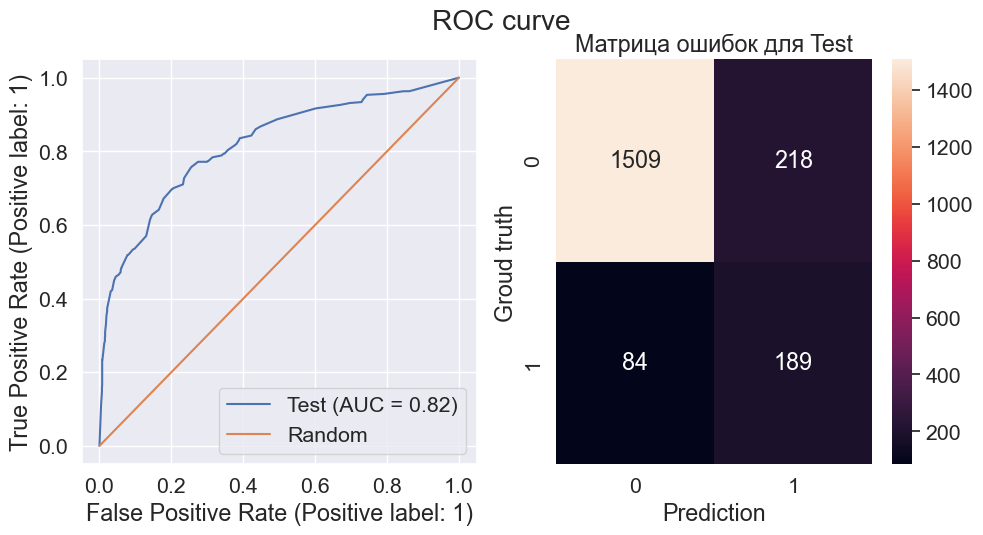

In [60]:
plot_graphics(gcv.best_estimator_)

**Для нас важнее не допускать ошибку FN (левый нижний столбец). Поскольку не столько страшно предсказать, что клиент уходит, сколько предсказать, что не уходит, а на самом деле клиент уйдет. Значит для нас важнее, чтобы ошибка FN была минимальна!**

**DecisionTree не побила Baseline, не смогла пробить 0.59 на f1, дисбаланс сыграл свою роль!**

## Логистическая регрессия

Первая модель на рассмотрение - логистическая регрессия. 

Построим pipeline. Теперь для масштабирования данных используем StandartScaler, он лучше работает с линейными моделями. В качестве балансировки класса используем oversampling - SMOTE

In [61]:
# масштабирую и заполняю числовые признаки
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('fill_na', KNNImputer())])


# обработка категориальных переменных OHE
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=True))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


pipe = Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                     ('del_outlier_balance', Outlier_feature_Balance_Transform(1.5)),
                     ('preprocessor_feature', preprocessor),
                       ('sampling', SMOTE(n_jobs=-1, random_state=RS_CONST)),
                      ('model', LogisticRegression(random_state=RS_CONST, n_jobs=-1))])

**Отрисую итоговый pipeline:**

In [62]:
from sklearn import set_config

set_config(display='diagram')   

pipe

Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                ('del_outlier_balance',
                 Outlier_feature_Balance_Transform(power=1.5)),
                ('preprocessor_feature',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('fill_na',
                                                                   KNNImputer())]),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'estimated_salary',
                                                   'num_of_products']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['geography', 'gender',
                                                   'has_cr_card',
                                                   'is_active_member'])])),
                ('sampling', SMOTE(n_jobs=-1, random_state=42)),
                ('model', LogisticRegression(n_jobs=-1, random_state=42))])

**Переберу параметры на стратифицированной кросс-валидации с помощью GridSearchCV**

In [63]:
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


parameters = {'del_outlier_balance__power' : [1.15, 1.25],
              "preprocessor_feature__num__fill_na__n_neighbors": [5, 6, 7, 8],
              "preprocessor_feature__num__fill_na__weights": ['uniform', 'distance'],
              'sampling__sampling_strategy' : ['auto','all'],
              'sampling__k_neighbors' : [5, 6, 7, 8]}


gcv = RandomizedSearchCV(pipe, parameters, n_jobs=-1, cv=skf, refit='f1', scoring=['f1', 'roc_auc'], n_iter=20, random_state=RS_CONST)

gcv.fit(train[X], train['exited'])

gcv.best_score_

Wall time: 17.3 s


0.4895116382437343

In [64]:
gcv

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('del_dupl',
                                              Drop_duplicates_Transform()),
                                             ('del_outlier_balance',
                                              Outlier_feature_Balance_Transform(power=1.5)),
                                             ('preprocessor_feature',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler()),
                                                                                               ('fill_na',
                                                                                                KNNImputer())]),
                                                                               [...
                                                                 random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'del_outlier_balance__power': [1.15,
                                                                       1.25],
                                        'preprocessor_feature__num__fill_na__n_neighbors': [5,
                                                                                            6,
                                                                                            7,
                                                                                            8],
                                        'preprocessor_feature__num__fill_na__weights': ['uniform',
                                                                                        'distance'],
                                        'sampling__k_neighbors': [5, 6, 7, 8],
                                        'sampling__sampling_strategy': ['auto',
                                                                        'all']},
                   random_state=42, refit='f1', scoring=['f1', 'roc_auc'])

In [65]:
estimated_model_cross_val(gcv, 'LogRed_SMOTE')

In [66]:
rating

,f1_cross_val,ROC_AUC_cross_val,f1_test
DecisionTree_before_balance,0.553453,0.817538,0.555882
LogRed_SMOTE,0.489512,0.765100,0.501748


<Figure size 640x480 with 0 Axes>

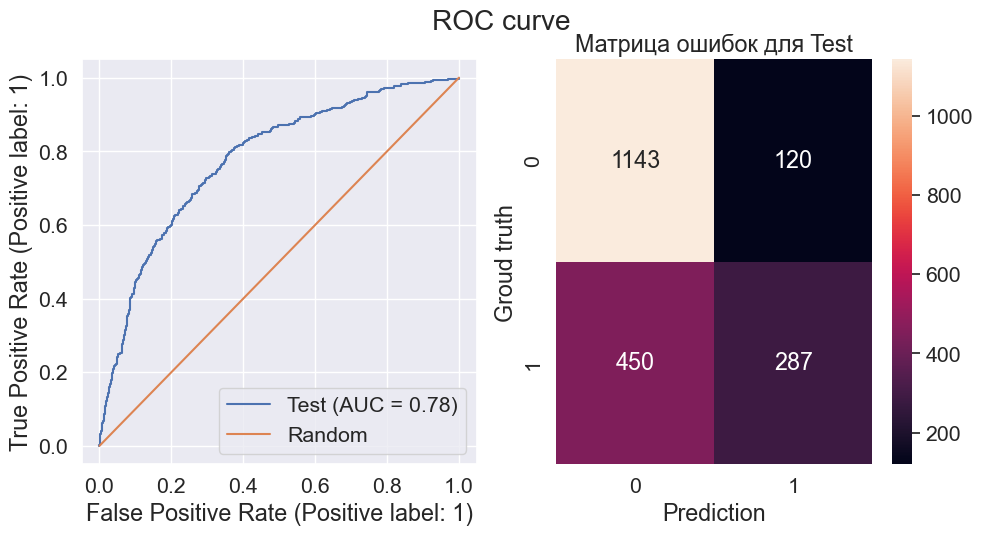

In [67]:
plot_graphics(gcv.best_estimator_)

**Для нас важнее не допускать ошибку FN (левый нижний столбец). Поскольку не столько страшно предсказать, что клиент уходит, сколько предсказать, что не уходит, а на самом деле клиент уйдет. Значит для нас важнее, чтобы ошибка FN была минимальна!**

**Логистическая регрессия не побила Baseline, не смогла пробить 0.59 на f1**

**Теперь используем другой метод борьбы с дисбалансом - балансировка:**

In [68]:
# масштабирую и заполняю числовые признаки
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('fill_na', KNNImputer())])


# обработка категориальных переменных OHE
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=True))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


pipe = Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                     ('del_outlier_balance', Outlier_feature_Balance_Transform(1.5)),
                     ('preprocessor_feature', preprocessor),
#                        ('sampling', SMOTE(n_jobs=-1, random_state=41)),
                      ('model', LogisticRegression(random_state=RS_CONST, n_jobs=-1))])

In [69]:
pipe

Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                ('del_outlier_balance',
                 Outlier_feature_Balance_Transform(power=1.5)),
                ('preprocessor_feature',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('fill_na',
                                                                   KNNImputer())]),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'estimated_salary',
                                                   'num_of_products']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['geography', 'gender',
                                                   'has_cr_card',
                                                   'is_active_member'])])),
                ('model', LogisticRegression(n_jobs=-1, random_state=42))])

In [70]:
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


parameters = {'del_outlier_balance__power' : [1.15, 1.25, 1.5],
              "preprocessor_feature__num__fill_na__n_neighbors": [5, 6, 7, 8],
              "preprocessor_feature__num__fill_na__weights": ['uniform', 'distance'],
              'model__class_weight': ['balanced', None]}


gcv = RandomizedSearchCV(pipe, parameters, n_jobs=-1, cv=skf, refit='f1', scoring=['f1', 'roc_auc'], n_iter=20, random_state=RS_CONST)

gcv.fit(train[X], train['exited'])

gcv.best_score_

Wall time: 16.3 s


0.4876263370157788

In [71]:
estimated_model_cross_val(gcv, 'LogRed_balanced')

In [72]:
rating

,f1_cross_val,ROC_AUC_cross_val,f1_test
DecisionTree_before_balance,0.553453,0.817538,0.555882
LogRed_SMOTE,0.489512,0.765100,0.501748
LogRed_balanced,0.487626,0.766286,0.500873


<Figure size 640x480 with 0 Axes>

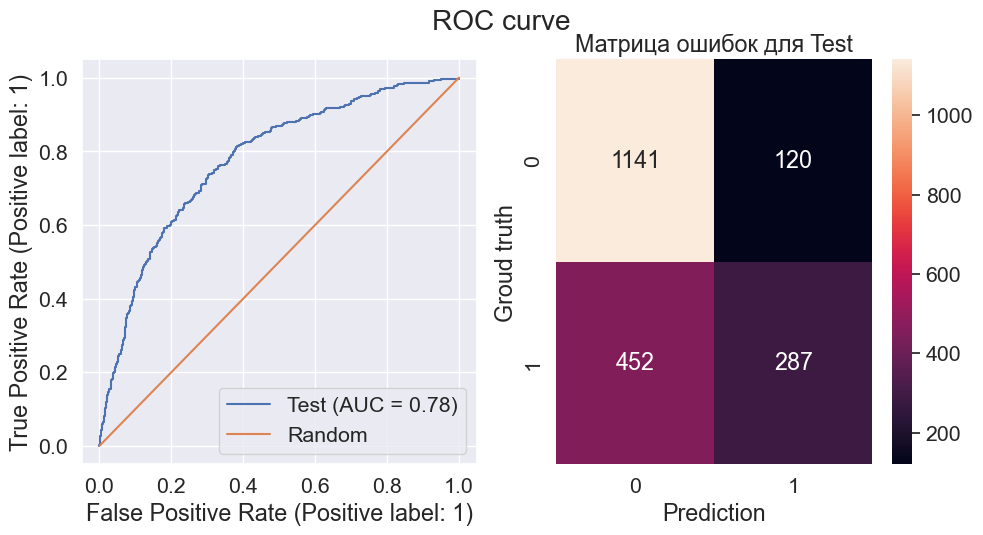

In [73]:
plot_graphics(gcv.best_estimator_)

**Для нас важнее не допускать ошибку FN (левый нижний столбец). Поскольку не столько страшно предсказать, что клиент уходит, сколько предсказать, что не уходит, а на самом деле клиент уйдет. Значит для нас важнее, чтобы ошибка FN была минимальна!**

**Логистическая регрессия не побила Baseline,  не смогла пробить 0.59 на f1**

## KNN

Вторая модель на рассмотрение - KNN. 

Построим pipeline. Теперь для масштабирования данных используем MinMaxScaler, он лучше работает с моделями, основанными на расстоянии. В качестве балансировки класса используем oversampling - SMOTE, + weights balanced в модели

In [74]:
# масштабирую и заполняю числовые признаки
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('fill_na', KNNImputer())])


# обработка категориальных переменных OHE
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=True))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


pipe = Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                     ('del_outlier_balance', Outlier_feature_Balance_Transform(1.5)),
                     ('preprocessor_feature', preprocessor),
                       ('sampling', SMOTE(n_jobs=-1, random_state=RS_CONST)),
                      ('model', KNeighborsClassifier())])

**Отрисую итоговый pipeline:**

In [75]:
from sklearn import set_config

set_config(display='diagram')   

pipe

Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                ('del_outlier_balance',
                 Outlier_feature_Balance_Transform(power=1.5)),
                ('preprocessor_feature',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('fill_na',
                                                                   KNNImputer())]),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'estimated_salary',
                                                   'num_of_products']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['geography', 'gender',
                                                   'has_cr_card',
                                                   'is_active_member'])])),
                ('sampling', SMOTE(n_jobs=-1, random_state=42)),
                ('model', KNeighborsClassifier())])

**Переберу параметры на стратифицированной кросс-валидации с помощью GridSearchCV**

In [76]:
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


parameters = {'del_outlier_balance__power' : [1.15, 1.25],
              "preprocessor_feature__num__fill_na__n_neighbors": [5, 6, 7, 8],
              "preprocessor_feature__num__fill_na__weights": ['uniform', 'distance'],
              'sampling__sampling_strategy' : ['all'],
              'sampling__k_neighbors' : [5, 6, 7], 
#               'model__weights': ['uniform', 'distance'],
              'model__n_neighbors': [5, 6, 7, 8, 9]
             }


gcv = RandomizedSearchCV(pipe, parameters, n_jobs=-1, cv=skf, refit='f1', scoring=['f1', 'roc_auc'], n_iter=20, random_state=RS_CONST)

gcv.fit(train[X], train['exited'])

gcv.best_score_

Wall time: 19.1 s


0.488020750812255

In [77]:
gcv.best_params_

{'sampling__sampling_strategy': 'all',
 'sampling__k_neighbors': 5,
 'preprocessor_feature__num__fill_na__weights': 'distance',
 'preprocessor_feature__num__fill_na__n_neighbors': 8,
 'model__n_neighbors': 8,
 'del_outlier_balance__power': 1.15}

In [78]:
estimated_model_cross_val(gcv, 'KNN_SMOTE')

In [79]:
rating

,f1_cross_val,ROC_AUC_cross_val,f1_test
DecisionTree_before_balance,0.553453,0.817538,0.555882
LogRed_SMOTE,0.489512,0.765100,0.501748
LogRed_balanced,0.487626,0.766286,0.500873
KNN_SMOTE,0.488021,0.752786,0.485149


<Figure size 640x480 with 0 Axes>

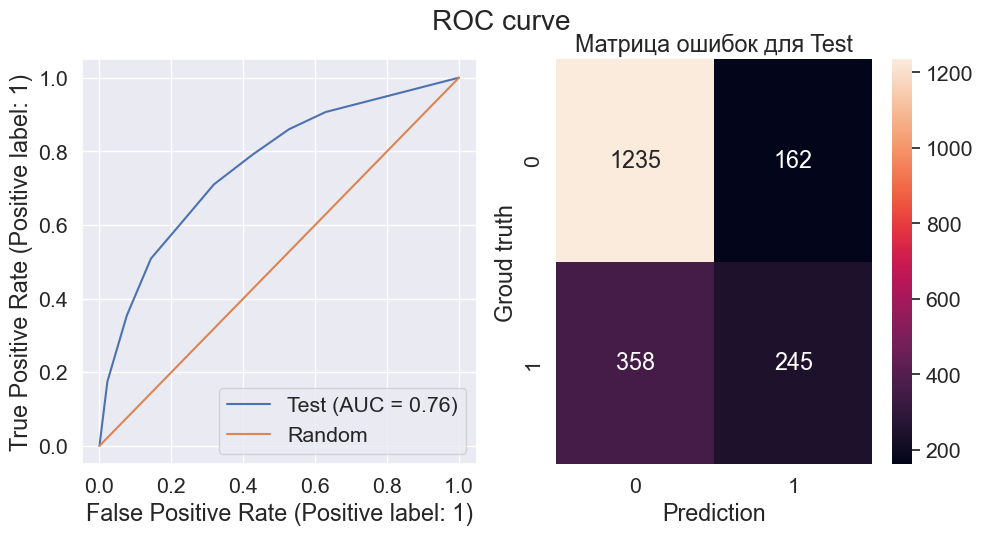

In [80]:
plot_graphics(gcv.best_estimator_)

**Для нас важнее не допускать ошибку FN (левый нижний столбец). Поскольку не столько страшно предсказать, что клиент уходит, сколько предсказать, что не уходит, а на самом деле клиент уйдет. Значит для нас важнее, чтобы ошибка FN была минимальна!**

**knn не побила Baseline, не смогла пробить 0.59 на f1**

**Теперь используем балансировку классов**

In [81]:
# масштабирую и заполняю числовые признаки
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('fill_na', KNNImputer())])


# обработка категориальных переменных OHE
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=True))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


pipe = Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                     ('del_outlier_balance', Outlier_feature_Balance_Transform(1.5)),
                     ('preprocessor_feature', preprocessor),
                      ('model', KNeighborsClassifier())])

In [82]:
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


parameters = {'del_outlier_balance__power' : [1.15, 1.25, 1.5],
              "preprocessor_feature__num__fill_na__n_neighbors": [5, 6, 7, 8],
              "preprocessor_feature__num__fill_na__weights": ['uniform', 'distance'],
#               'sampling__sampling_strategy' : ['all'],
#               'sampling__k_neighbors' : [5, 6], 
              'model__weights': ['uniform', 'distance'],
              'model__n_neighbors': [5, 6, 7, 8, 9]
             }


gcv = RandomizedSearchCV(pipe, parameters, n_jobs=-1, cv=skf, refit='f1', scoring=['f1', 'roc_auc'], n_iter=20, random_state=RS_CONST)

gcv.fit(train[X], train['exited'])

gcv.best_score_

Wall time: 16.4 s


0.4004966800608984

In [83]:
estimated_model_cross_val(gcv, 'KNN_balanced')

In [84]:
rating

,f1_cross_val,ROC_AUC_cross_val,f1_test
DecisionTree_before_balance,0.553453,0.817538,0.555882
LogRed_SMOTE,0.489512,0.765100,0.501748
LogRed_balanced,0.487626,0.766286,0.500873
KNN_SMOTE,0.488021,0.752786,0.485149
KNN_balanced,0.400497,0.743117,0.407583


<Figure size 640x480 with 0 Axes>

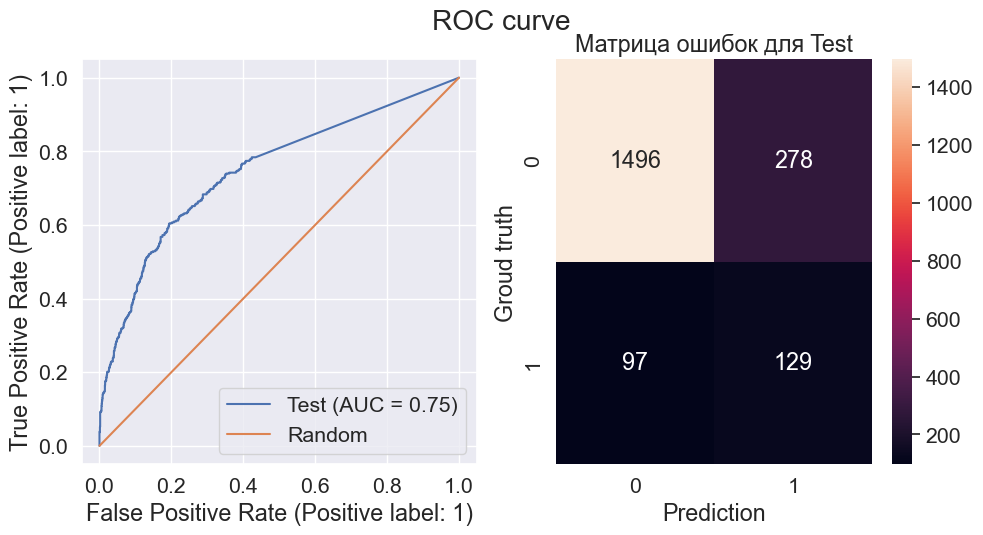

In [85]:
plot_graphics(gcv.best_estimator_)

**knn не побила Baseline, не смогла пробить 0.59 на f1**

## DecisionTreeClassifier

Третья модель на рассмотрение - Дерево решений. 

Построим pipeline. В качестве балансировки класса используем oversampling - SMOTE, + weights balanced в модели. **Для дерева масштабирование не используют, поскольку оно не влияет на результат, но я его оставлю, чтобы KNNImputer отработал корректно**

In [86]:
# масштабирую и заполняю числовые признаки
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('fill_na', KNNImputer())])


# обработка категориальных переменных OHE
categorical_transformer = Pipeline(steps=[
 ('ordinal', OrdinalEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


pipe = Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                     ('del_outlier_balance', Outlier_feature_Balance_Transform(1.5)),
                     ('preprocessor_feature', preprocessor),
                       ('sampling', SMOTE(n_jobs=-1, random_state=RS_CONST)),
                      ('model', DecisionTreeClassifier(random_state=RS_CONST))])

**Отрисую итоговый pipeline:**

In [87]:
from sklearn import set_config

set_config(display='diagram')   

pipe

Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                ('del_outlier_balance',
                 Outlier_feature_Balance_Transform(power=1.5)),
                ('preprocessor_feature',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('fill_na',
                                                                   KNNImputer())]),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'estimated_salary',
                                                   'num_of_products']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['geography', 'gender',
                                                   'has_cr_card',
                                                   'is_active_member'])])),
                ('sampling', SMOTE(n_jobs=-1, random_state=42)),
                ('model', DecisionTreeClassifier(random_state=42))])

**Переберу параметры на стратифицированной кросс-валидации с помощью GridSearchCV**

In [88]:
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


parameters = {'del_outlier_balance__power' : [ 1.25, 1.35],
              "preprocessor_feature__num__fill_na__n_neighbors": [5, 6, 7, 8],
              "preprocessor_feature__num__fill_na__weights": [ 'distance'],
              'sampling__sampling_strategy' : ['auto', 'minority'],
              'sampling__k_neighbors' : [8, 9], 
              'model__min_samples_leaf': range(5, 10),
              'model__max_depth': range(6, 11)
             }


gcv = RandomizedSearchCV(pipe, parameters, n_jobs=-1, cv=skf, refit='f1', scoring=['f1', 'roc_auc'], n_iter=20, random_state=RS_CONST)

gcv.fit(train[X], train['exited'])

gcv.best_score_

Wall time: 16.3 s


0.583733546012003

In [89]:
gcv.best_params_

{'sampling__sampling_strategy': 'auto',
 'sampling__k_neighbors': 9,
 'preprocessor_feature__num__fill_na__weights': 'distance',
 'preprocessor_feature__num__fill_na__n_neighbors': 5,
 'model__min_samples_leaf': 9,
 'model__max_depth': 6,
 'del_outlier_balance__power': 1.25}

In [90]:
estimated_model_cross_val(gcv, 'DecisionTree_SMOTE')

In [91]:
rating

,f1_cross_val,ROC_AUC_cross_val,f1_test
DecisionTree_before_balance,0.553453,0.817538,0.555882
LogRed_SMOTE,0.489512,0.765100,0.501748
LogRed_balanced,0.487626,0.766286,0.500873
KNN_SMOTE,0.488021,0.752786,0.485149
KNN_balanced,0.400497,0.743117,0.407583
DecisionTree_SMOTE,0.583734,0.831973,0.557157


<Figure size 1000x1000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

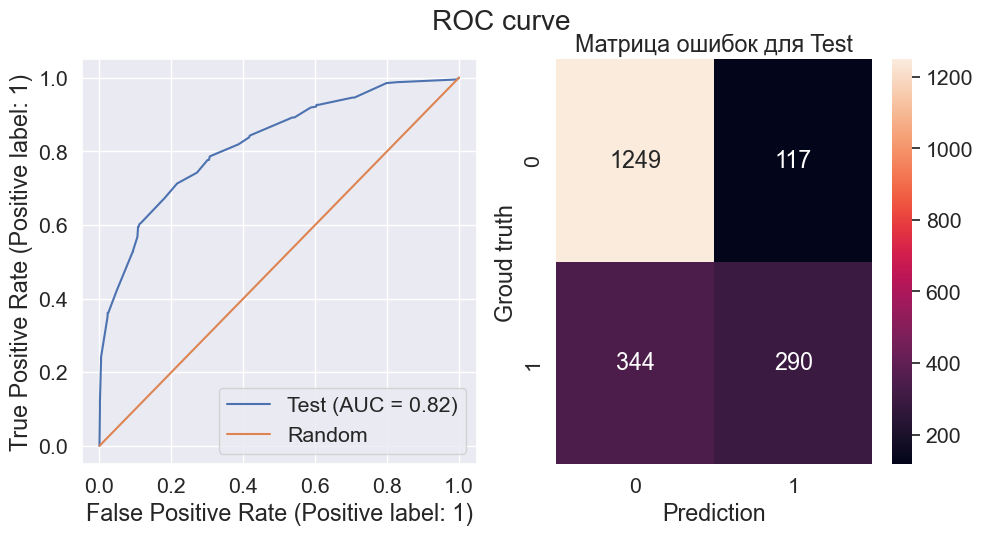

In [92]:
plt.figure(figsize=(10, 10))
plot_graphics(gcv.best_estimator_)

**Для нас важнее не допускать ошибку FN (левый нижний столбец). Поскольку не столько страшно предсказать, что клиент уходит, сколько предсказать, что не уходит, а на самом деле клиент уйдет. Значит для нас важнее, чтобы ошибка FN была минимальна!**

**DecisionTree не побила Baseline, не смогла пробить 0.59 на f1**

**Теперь используем балансировку классов**

In [93]:
# масштабирую и заполняю числовые признаки
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('fill_na', KNNImputer())])


# обработка категориальных переменных OHE
categorical_transformer = Pipeline(steps=[
 ('ordinal', OrdinalEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


pipe = Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                     ('del_outlier_balance', Outlier_feature_Balance_Transform(1.5)),
                     ('preprocessor_feature', preprocessor),
#                        ('sampling', SMOTE(n_jobs=-1, random_state=RS_CONST)),
                      ('model', DecisionTreeClassifier(random_state=RS_CONST))])

In [94]:
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


parameters = {'del_outlier_balance__power' : [ 1.25, 1.35],
              "preprocessor_feature__num__fill_na__n_neighbors": [5, 6, 7, 8],
              "preprocessor_feature__num__fill_na__weights": [ 'distance'],
#               'sampling__sampling_strategy' : ['auto', 'minority'],
#               'sampling__k_neighbors' : [8, 9], 
              'model__min_samples_leaf': range(5, 9),
              'model__max_depth': range(6, 11),
              'model__class_weight' : ['balanced', None]
             }


gcv = RandomizedSearchCV(pipe, parameters, n_jobs=-1, cv=skf, refit='f1', scoring=['f1', 'roc_auc'], n_iter=20, random_state=RS_CONST)

gcv.fit(train[X], train['exited'])

gcv.best_score_

Wall time: 16.1 s


0.5538395165799377

In [95]:
estimated_model_cross_val(gcv, 'DecisionTree_balanced')

In [96]:
rating

,f1_cross_val,ROC_AUC_cross_val,f1_test
DecisionTree_before_balance,0.553453,0.817538,0.555882
LogRed_SMOTE,0.489512,0.765100,0.501748
LogRed_balanced,0.487626,0.766286,0.500873
KNN_SMOTE,0.488021,0.752786,0.485149
KNN_balanced,0.400497,0.743117,0.407583
DecisionTree_SMOTE,0.583734,0.831973,0.557157
DecisionTree_balanced,0.553840,0.827703,0.553492


<Figure size 1000x1000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

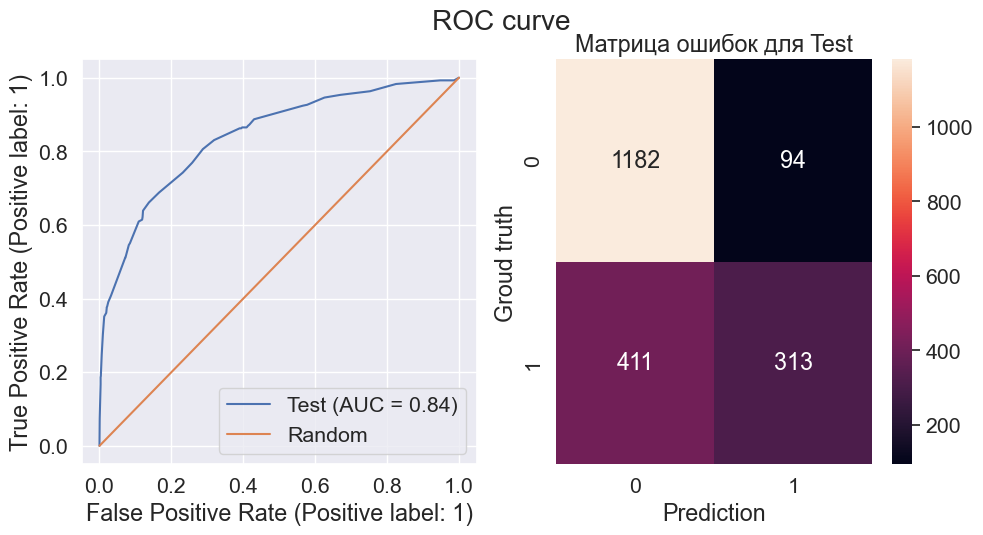

In [97]:
plt.figure(figsize=(10, 10))
plot_graphics(gcv.best_estimator_)

**DecisionTree не побила Baseline, не смогла пробить 0.59 на f1**

## RandomForestClassifier

Четвертая модель на рассмотрение - Случайный лес. 

Построим pipeline. В качестве балансировки класса используем oversampling - SMOTE, + weights balanced в модели. **Для дерева масштабирование не используют, поскольку оно не влияет на результат, но я его оставлю, чтобы KNNImputer отработал корректно**

In [98]:
# масштабирую и заполняю числовые признаки
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('fill_na', KNNImputer())])


# обработка категориальных переменных OHE
categorical_transformer = Pipeline(steps=[
 ('ordinal', OrdinalEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


pipe = Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                     ('del_outlier_balance', Outlier_feature_Balance_Transform(1.5)),
                     ('preprocessor_feature', preprocessor),
                       ('sampling', SMOTE(n_jobs=-1, random_state=RS_CONST)),
                      ('model', RandomForestClassifier(random_state=RS_CONST, n_jobs=-1))])

**Отрисую итоговый pipeline:**

In [99]:
from sklearn import set_config

set_config(display='diagram')   

pipe

Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                ('del_outlier_balance',
                 Outlier_feature_Balance_Transform(power=1.5)),
                ('preprocessor_feature',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('fill_na',
                                                                   KNNImputer())]),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'estimated_salary',
                                                   'num_of_products']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['geography', 'gender',
                                                   'has_cr_card',
                                                   'is_active_member'])])),
                ('sampling', SMOTE(n_jobs=-1, random_state=42)),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

**Переберу параметры на стратифицированной кросс-валидации с помощью GridSearchCV**

In [100]:
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


parameters = {'del_outlier_balance__power' : [1.35],
              "preprocessor_feature__num__fill_na__n_neighbors": [5, 6, 7],
              "preprocessor_feature__num__fill_na__weights": ['distance'],
              'sampling__sampling_strategy' : ['all'],
              'sampling__k_neighbors' : [5, 6, 7, 8], 
              'model__min_samples_leaf': range(2, 9),
              'model__max_depth': range(9, 15),
              'model__n_estimators' : [150, 200, 250]}

gcv = RandomizedSearchCV(pipe, parameters, n_jobs=-1, cv=skf, refit='f1', scoring=['f1', 'roc_auc'], n_iter=40, random_state=RS_CONST)

gcv.fit(train[X], train['exited'])

gcv.best_score_

Wall time: 1min 27s


0.6008635734892376

In [101]:
gcv.best_params_

{'sampling__sampling_strategy': 'all',
 'sampling__k_neighbors': 7,
 'preprocessor_feature__num__fill_na__weights': 'distance',
 'preprocessor_feature__num__fill_na__n_neighbors': 7,
 'model__n_estimators': 250,
 'model__min_samples_leaf': 3,
 'model__max_depth': 12,
 'del_outlier_balance__power': 1.35}

In [102]:
estimated_model_cross_val(gcv, 'RandomForest_SMOTE')

In [103]:
rating

,f1_cross_val,ROC_AUC_cross_val,f1_test
DecisionTree_before_balance,0.553453,0.817538,0.555882
LogRed_SMOTE,0.489512,0.765100,0.501748
LogRed_balanced,0.487626,0.766286,0.500873
KNN_SMOTE,0.488021,0.752786,0.485149
KNN_balanced,0.400497,0.743117,0.407583
DecisionTree_SMOTE,0.583734,0.831973,0.557157
DecisionTree_balanced,0.553840,0.827703,0.553492
RandomForest_SMOTE,0.600864,0.854098,0.605993


<Figure size 1000x1000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

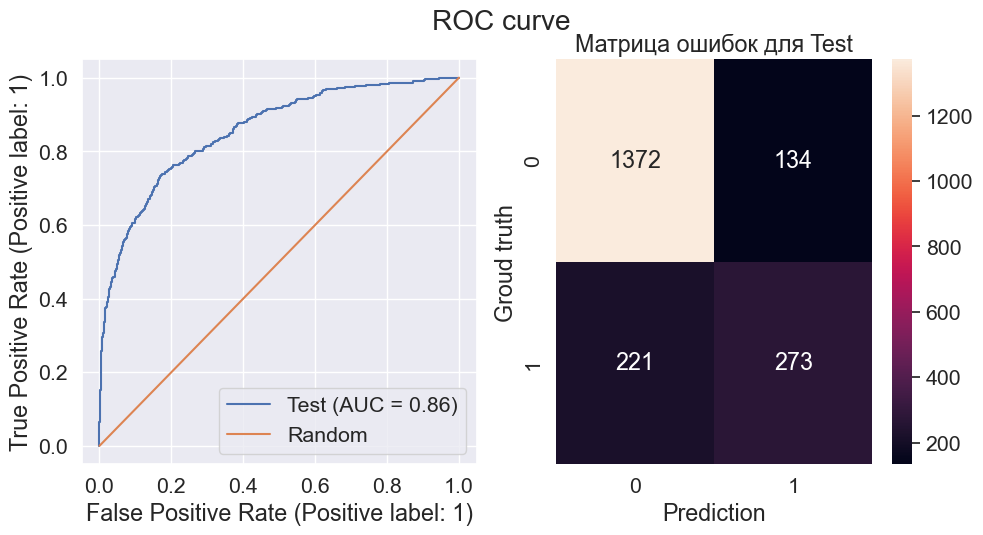

In [104]:
plt.figure(figsize=(10, 10))
plot_graphics(gcv.best_estimator_)

**Для нас важнее не допускать ошибку FN (левый нижний столбец). Поскольку не столько страшно предсказать, что клиент уходит, сколько предсказать, что не уходит, а на самом деле клиент уйдет. Значит для нас важнее, чтобы ошибка FN была минимальна!**

**Теперь используем балансировку классов**

In [105]:
# масштабирую и заполняю числовые признаки
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('fill_na', KNNImputer())])


# обработка категориальных переменных OHE
categorical_transformer = Pipeline(steps=[
 ('ordinal', OrdinalEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


pipe = Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                     ('del_outlier_balance', Outlier_feature_Balance_Transform(1.5)),
                     ('preprocessor_feature', preprocessor),
#                        ('sampling', SMOTE(n_jobs=-1, random_state=RS_CONST)),
                      ('model', RandomForestClassifier(random_state=RS_CONST, n_jobs=-1))])

In [106]:
pipe

Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                ('del_outlier_balance',
                 Outlier_feature_Balance_Transform(power=1.5)),
                ('preprocessor_feature',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('fill_na',
                                                                   KNNImputer())]),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'estimated_salary',
                                                   'num_of_products']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['geography', 'gender',
                                                   'has_cr_card',
                                                   'is_active_member'])])),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [107]:
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


parameters = {'del_outlier_balance__power' : [1.35],
              "preprocessor_feature__num__fill_na__n_neighbors": [5, 6, 7],
              "preprocessor_feature__num__fill_na__weights": ['distance'],
#               'sampling__sampling_strategy' : ['all'],
#               'sampling__k_neighbors' : [5, 6, 7], 
              'model__min_samples_leaf': range(2, 9),
              'model__max_depth': range(9, 15),
              'model__n_estimators' : [150, 200, 250],
               'model__class_weight' : ['balanced', None]
}

gcv = RandomizedSearchCV(pipe, parameters, n_jobs=-1, cv=skf, refit='f1', scoring=['f1', 'roc_auc'], n_iter=40, random_state=RS_CONST)

gcv.fit(train[X], train['exited'])

gcv.best_score_

Wall time: 1min 4s


0.6204239285398108

In [108]:
estimated_model_cross_val(gcv, 'RandomForest_balanced')

In [109]:
rating

,f1_cross_val,ROC_AUC_cross_val,f1_test
DecisionTree_before_balance,0.553453,0.817538,0.555882
LogRed_SMOTE,0.489512,0.765100,0.501748
LogRed_balanced,0.487626,0.766286,0.500873
KNN_SMOTE,0.488021,0.752786,0.485149
KNN_balanced,0.400497,0.743117,0.407583
DecisionTree_SMOTE,0.583734,0.831973,0.557157
DecisionTree_balanced,0.553840,0.827703,0.553492
RandomForest_SMOTE,0.600864,0.854098,0.605993
RandomForest_balanced,0.620424,0.857030,0.622066


<Figure size 1000x1000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

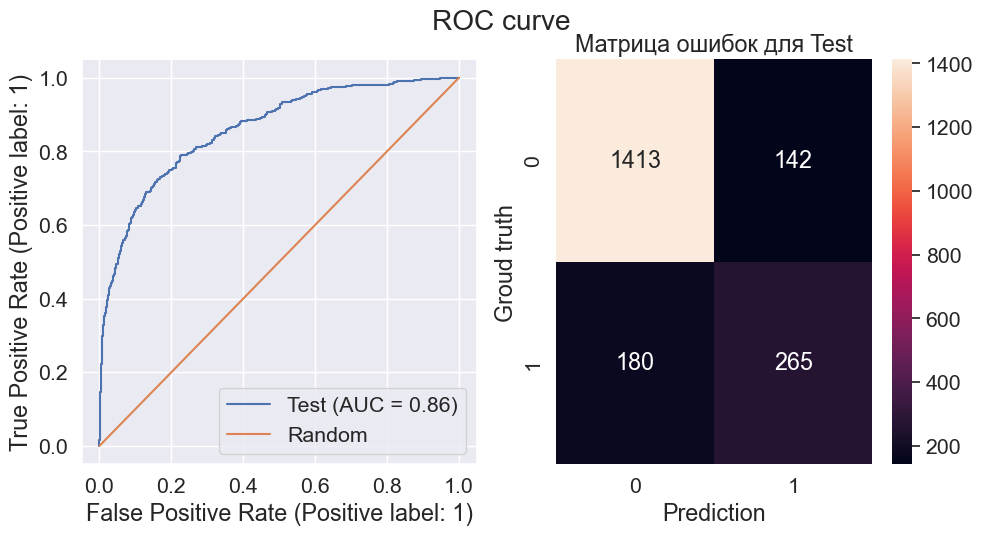

In [110]:
plt.figure(figsize=(10, 10))
plot_graphics(gcv.best_estimator_)

### Важность признаков в случайном лесе

In [111]:
gcv.best_estimator_[-1].feature_importances_

array([0.08607723, 0.32011493, 0.05271324, 0.1199138 , 0.08890011,
       0.19603859, 0.04797108, 0.02337059, 0.01079085, 0.05410959])

In [112]:
train[X].columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary'],
      dtype='object')

In [113]:
forest_importances = pd.DataFrame(gcv.best_estimator_[-1]\
                                  .feature_importances_, index=train[X].columns)\
                                  .rename({0 : 'feature_importance'}, axis=1)\
                                  .sort_values(by='feature_importance', ascending=False)
forest_importances

,feature_importance
geography,0.320115
balance,0.196039
age,0.119914
tenure,0.088900
credit_score,0.086077
estimated_salary,0.054110
gender,0.052713
num_of_products,0.047971
has_cr_card,0.023371
is_active_member,0.010791


Text(0, 0.5, 'Важность')

<Figure size 500x500 with 0 Axes>

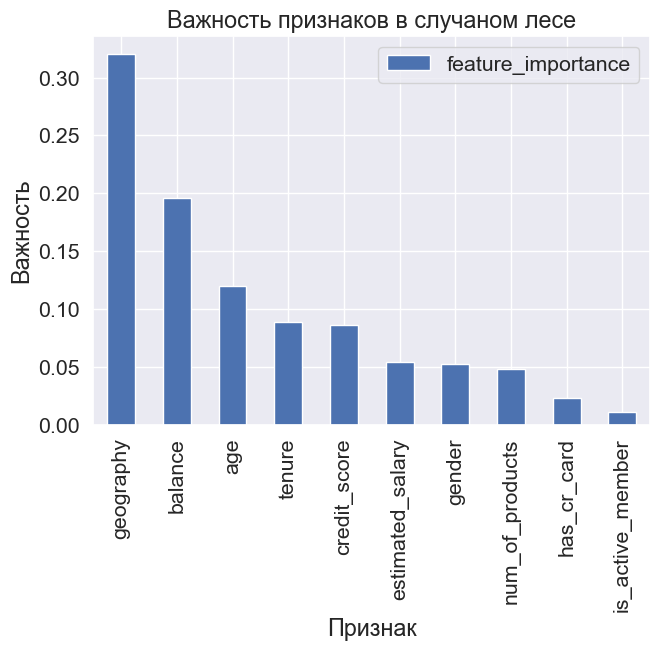

In [114]:
plt.figure(figsize=(5, 5))
forest_importances.plot(kind='bar')
plt.title('Важность признаков в случаном лесе')
plt.xlabel('Признак')
plt.ylabel('Важность')

**По важности, случаный лес на 1 место поставил местоположение!**

**RandomForest побила Baseline, и смогла пробить 0.59 на f1**

## SVС

Пятая модель на рассмотрение - Метод опорных векторов. 

Построим pipeline. В качестве балансировки класса используем oversampling - SMOTE, + weights balanced в модели. **Используем для SVM стандартизацию**

In [115]:
# масштабирую и заполняю числовые признаки
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('fill_na', KNNImputer())])


# обработка категориальных переменных OHE
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=True))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


pipe = Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                     ('del_outlier_balance', Outlier_feature_Balance_Transform(1.5)),
                     ('preprocessor_feature', preprocessor),
                       ('sampling', SMOTE(n_jobs=-1, random_state=RS_CONST)),
                      ('model', SVC(random_state=RS_CONST))])

**Отрисую итоговый pipeline:**

In [116]:
from sklearn import set_config

set_config(display='diagram')   

pipe

Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                ('del_outlier_balance',
                 Outlier_feature_Balance_Transform(power=1.5)),
                ('preprocessor_feature',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('fill_na',
                                                                   KNNImputer())]),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'estimated_salary',
                                                   'num_of_products']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['geography', 'gender',
                                                   'has_cr_card',
                                                   'is_active_member'])])),
                ('sampling', SMOTE(n_jobs=-1, random_state=42)),
                ('model', SVC(random_state=42))])

**Переберу параметры на стратифицированной кросс-валидации с помощью GridSearchCV**

In [117]:
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


parameters = {'del_outlier_balance__power' : [1.35, 1.25],
              "preprocessor_feature__num__fill_na__n_neighbors": [5, 6, 7],
              "preprocessor_feature__num__fill_na__weights": ['distance'],
              'sampling__sampling_strategy' : ['all'],
              'sampling__k_neighbors' : [5, 6, 7], 
              'model__kernel': ['rbf']}

gcv = RandomizedSearchCV(pipe, parameters, n_jobs=-1, cv=skf, refit='f1', scoring=['f1', 'roc_auc'], n_iter=10, random_state=RS_CONST)

gcv.fit(train[X], train['exited'])

gcv.best_score_

Wall time: 58.3 s


0.5866570022151151

In [118]:
gcv.best_params_

{'sampling__sampling_strategy': 'all',
 'sampling__k_neighbors': 5,
 'preprocessor_feature__num__fill_na__weights': 'distance',
 'preprocessor_feature__num__fill_na__n_neighbors': 6,
 'model__kernel': 'rbf',
 'del_outlier_balance__power': 1.35}

In [119]:
estimated_model_cross_val(gcv, 'SVC_SMOTE')

In [120]:
rating

,f1_cross_val,ROC_AUC_cross_val,f1_test
DecisionTree_before_balance,0.553453,0.817538,0.555882
LogRed_SMOTE,0.489512,0.765100,0.501748
LogRed_balanced,0.487626,0.766286,0.500873
KNN_SMOTE,0.488021,0.752786,0.485149
KNN_balanced,0.400497,0.743117,0.407583
DecisionTree_SMOTE,0.583734,0.831973,0.557157
DecisionTree_balanced,0.553840,0.827703,0.553492
RandomForest_SMOTE,0.600864,0.854098,0.605993
RandomForest_balanced,0.620424,0.857030,0.622066
SVC_SMOTE,0.586657,0.836822,0.594758


<Figure size 1000x1000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

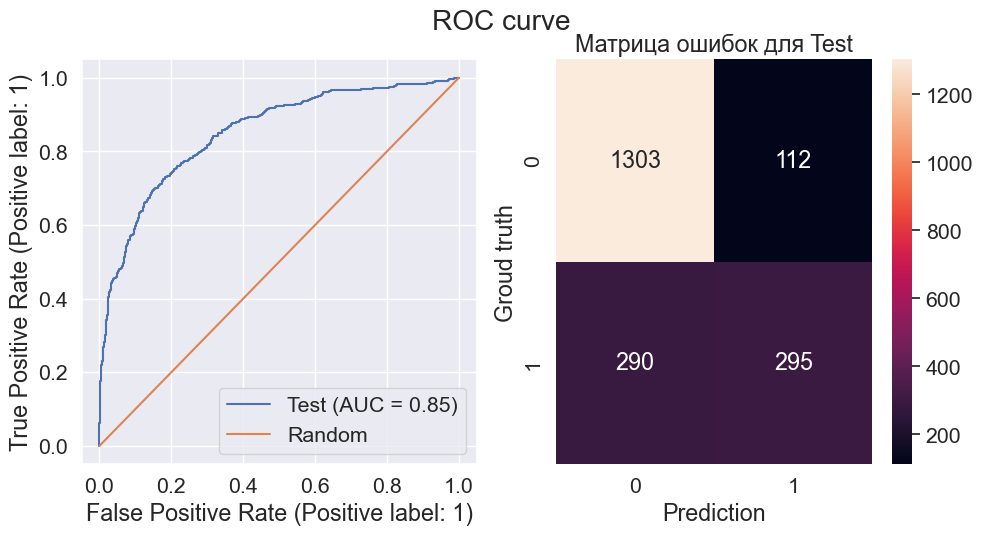

In [121]:
plt.figure(figsize=(10, 10))
plot_graphics(gcv.best_estimator_)

**Для нас важнее не допускать ошибку FN (левый нижний столбец). Поскольку не столько страшно предсказать, что клиент уходит, сколько предсказать, что не уходит, а на самом деле клиент уйдет. Значит для нас важнее, чтобы ошибка FN была минимальна!**

**SVC не побила Baseline, не смогла пробить 0.59 на f1**

**Теперь используем балансировку классов**

In [122]:
# масштабирую и заполняю числовые признаки
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('fill_na', KNNImputer())])


# обработка категориальных переменных OHE
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=True))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


pipe = Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                     ('del_outlier_balance', Outlier_feature_Balance_Transform(1.5)),
                     ('preprocessor_feature', preprocessor),
#                        ('sampling', SMOTE(n_jobs=-1, random_state=RS_CONST)),
                      ('model', SVC(random_state=RS_CONST))])

**Отрисую итоговый pipeline:**

In [123]:
from sklearn import set_config

set_config(display='diagram')   

pipe

Pipeline(steps=[('del_dupl', Drop_duplicates_Transform()),
                ('del_outlier_balance',
                 Outlier_feature_Balance_Transform(power=1.5)),
                ('preprocessor_feature',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('fill_na',
                                                                   KNNImputer())]),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'estimated_salary',
                                                   'num_of_products']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['geography', 'gender',
                                                   'has_cr_card',
                                                   'is_active_member'])])),
                ('model', SVC(random_state=42))])

**Переберу параметры на стратифицированной кросс-валидации с помощью GridSearchCV**

In [124]:
%%time


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


parameters = {'del_outlier_balance__power' : [1.35, 1.25],
              "preprocessor_feature__num__fill_na__n_neighbors": [5, 6, 7],
              "preprocessor_feature__num__fill_na__weights": ['distance'],
#               'sampling__sampling_strategy' : ['all'],
#               'sampling__k_neighbors' : [5, 6, 7], 
              'model__kernel': ['rbf'],
             'model__class_weight' : ['balanced', None]}

gcv = RandomizedSearchCV(pipe, parameters, n_jobs=-1, cv=skf, refit='f1', scoring=['f1', 'roc_auc'], n_iter=10, random_state=RS_CONST)

gcv.fit(train[X], train['exited'])

gcv.best_score_

Wall time: 25.6 s


0.5948715351263314

In [125]:
estimated_model_cross_val(gcv, 'SVC_balanced')

In [126]:
rating

,f1_cross_val,ROC_AUC_cross_val,f1_test
DecisionTree_before_balance,0.553453,0.817538,0.555882
LogRed_SMOTE,0.489512,0.765100,0.501748
LogRed_balanced,0.487626,0.766286,0.500873
KNN_SMOTE,0.488021,0.752786,0.485149
KNN_balanced,0.400497,0.743117,0.407583
DecisionTree_SMOTE,0.583734,0.831973,0.557157
DecisionTree_balanced,0.553840,0.827703,0.553492
RandomForest_SMOTE,0.600864,0.854098,0.605993
RandomForest_balanced,0.620424,0.857030,0.622066
SVC_SMOTE,0.586657,0.836822,0.594758


<Figure size 1000x1000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

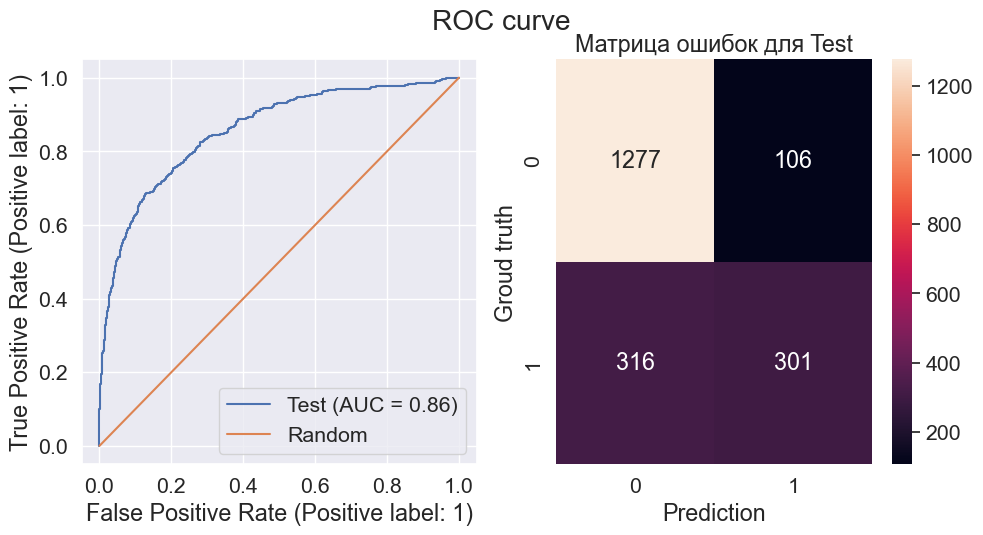

In [127]:
plt.figure(figsize=(10, 10))
plot_graphics(gcv.best_estimator_)

**Для нас важнее не допускать ошибку FN (левый нижний столбец). Поскольку не столько страшно предсказать, что клиент уходит, сколько предсказать, что не уходит, а на самом деле клиент уйдет. Значит для нас важнее, чтобы ошибка FN была минимальна!**

**SVC побила Baseline, и смогла пробить 0.59 на f1**

## CatBoostClassifier

Теперь обучим модель CatBoostClassifier

In [128]:
feature = ['credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary']

target = ['exited']

cat_feature = ['geography', 'gender', 'is_active_member', 'has_cr_card']



Переведем в тип данных для CatBoost

In [129]:
train_data = Pool(data=train[feature],
                 label=train[target],
                 cat_features=cat_feature)

test_data = Pool(data=test[feature],
                label=test[target],
                cat_features=cat_feature)

Посчитаем значения на кросс-валидации:

In [130]:
params = {'verbose' : 100,
         'eval_metric' : 'AUC',
         'loss_function' : 'Logloss',
         'random_seed' : RS_CONST,
         'learning_rate' : 0.01}

In [131]:
cv_data = cv(params=params,
            pool=train_data,
            fold_count=5,
            shuffle=5,
            partition_random_seed=42,
            stratified=True,
            verbose=False)

Training on fold [0/5]

bestTest = 0.864669511
bestIteration = 973

Training on fold [1/5]

bestTest = 0.8783528041
bestIteration = 707

Training on fold [2/5]

bestTest = 0.8711487899
bestIteration = 717

Training on fold [3/5]

bestTest = 0.8710211786
bestIteration = 926

Training on fold [4/5]

bestTest = 0.8645081912
bestIteration = 945



Найдем лучшую итерацию:

In [132]:
# качество моделей хранится в cv_data

cv_data

,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.822486,0.009389,0.684745,0.000230,0.684682,0.000234
1,1,0.826214,0.006374,0.676722,0.000342,0.676621,0.000220
2,2,0.835317,0.006883,0.669101,0.000446,0.668940,0.000272
3,3,0.834052,0.008632,0.662357,0.000704,0.662168,0.000566
4,4,0.834201,0.010000,0.656301,0.001291,0.656071,0.001336
...,...,...,...,...,...,...,...
995,995,0.869616,0.005617,0.330712,0.007182,0.288220,0.001467
996,996,0.869608,0.005612,0.330714,0.007175,0.288179,0.001460
997,997,0.869595,0.005609,0.330722,0.007170,0.288144,0.001466
998,998,0.869596,0.005623,0.330729,0.007176,0.288087,0.001460


In [133]:
cv_data[cv_data['test-AUC-mean'] == cv_data['test-AUC-mean'].max()]

,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
856,856,0.869774,0.005743,0.330936,0.007068,0.29495,0.001606


И видим, что лучшая иетрация с самым высоким качеством это 897. Сохраним эту лучшую итерацию

In [134]:
n_best_iters = cv_data[cv_data['test-AUC-mean'] == cv_data['test-AUC-mean'].max()]['iterations'].values[0]
n_best_iters

856

In [135]:
# теперь, зная этот гиперпараметр давай обучим модель

params = {'iterations' : n_best_iters,
         'learning_rate' : 0.01,
         'verbose' : 100,
         'random_seed' : RS_CONST,
         'eval_metric' : 'F1',
         'loss_function' : 'Logloss'}


model = CatBoostClassifier(**params)

model.fit(train_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5192698	total: 20.2ms	remaining: 17.2s
100:	learn: 0.5514736	total: 2.13s	remaining: 15.9s
200:	learn: 0.5583634	total: 4.16s	remaining: 13.6s
300:	learn: 0.5749405	total: 6.33s	remaining: 11.7s
400:	learn: 0.5874510	total: 8.4s	remaining: 9.53s
500:	learn: 0.5951826	total: 10.4s	remaining: 7.38s
600:	learn: 0.6036279	total: 12.4s	remaining: 5.28s
700:	learn: 0.6092970	total: 14.6s	remaining: 3.22s
800:	learn: 0.6176134	total: 16.6s	remaining: 1.14s
855:	learn: 0.6227636	total: 17.8s	remaining: 0us


Занесем качество с лучшей обученной модели:

In [136]:
model.best_score_['learn']['F1']

0.6230007616146229

In [137]:
    
f1_best_cross_val = model.best_score_['learn']['F1']
Roc_cross_val = np.nan
    
f1_test = roc_auc_score(test['exited'], model.predict(test[X]))
    
rating.loc[len(rating.index)] = [f1_best_cross_val, Roc_cross_val, f1_test]
rating.rename(index={(len(rating.index)-1): 'CatBoost'}, inplace=True)


In [138]:
rating

,f1_cross_val,ROC_AUC_cross_val,f1_test
DecisionTree_before_balance,0.553453,0.817538,0.555882
LogRed_SMOTE,0.489512,0.765100,0.501748
LogRed_balanced,0.487626,0.766286,0.500873
KNN_SMOTE,0.488021,0.752786,0.485149
KNN_balanced,0.400497,0.743117,0.407583
DecisionTree_SMOTE,0.583734,0.831973,0.557157
DecisionTree_balanced,0.553840,0.827703,0.553492
RandomForest_SMOTE,0.600864,0.854098,0.605993
RandomForest_balanced,0.620424,0.857030,0.622066
SVC_SMOTE,0.586657,0.836822,0.594758


<Figure size 640x480 with 0 Axes>

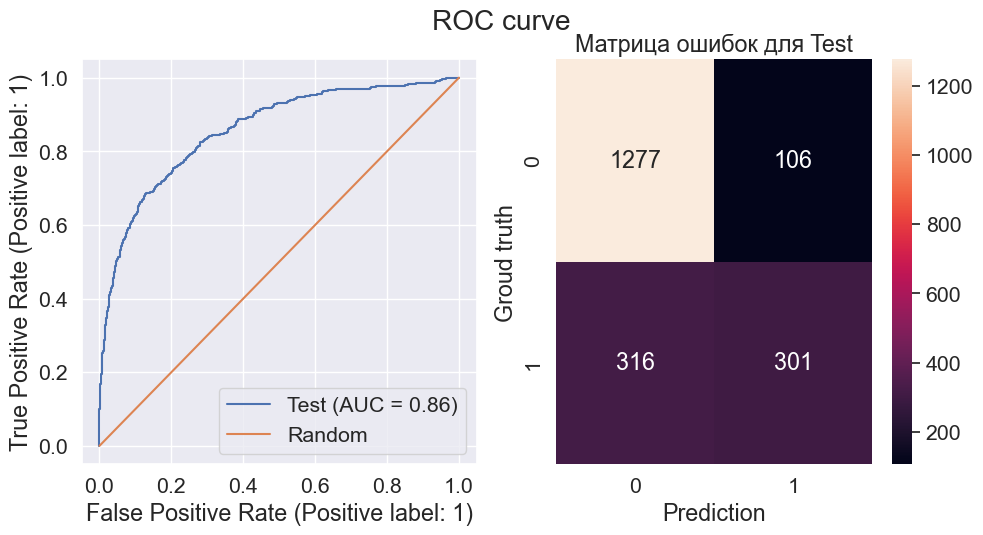

In [139]:
plot_graphics(model)

**Для нас важнее не допускать ошибку FN (левый нижний столбец). Поскольку не столько страшно предсказать, что клиент уходит, сколько предсказать, что не уходит, а на самом деле клиент уйдет. Значит для нас важнее, чтобы ошибка FN была минимальна!**

CatBoost на простых настройках пробил порог в 0.59 f1

# Интерпретация модели Catboost с помощью Shap

In [140]:
import shap
shap.initjs()

In [141]:
# теперь рассчитаем shap_values

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

In [142]:
shap_values

array([[ 0.02228499, -0.21628544, -0.23879387, ..., -0.00651939,
         0.31356644, -0.02181468],
       [ 0.04914865,  0.51280672, -0.18532979, ..., -0.0098411 ,
         0.32249911, -0.01305254],
       [ 0.04601928, -0.13573845,  0.29502977, ...,  0.04543777,
        -0.26093435, -0.05753183],
       ...,
       [ 0.07595582,  0.67229499,  0.23789868, ...,  0.04208873,
         0.43976619,  0.09065276],
       [-0.0352222 , -0.2318322 , -0.25424278, ...,  0.009841  ,
         0.2768906 , -0.0580389 ],
       [-0.03538963, -0.27700926, -0.19226323, ...,  0.01519738,
         0.40251345, -0.0230265 ]])

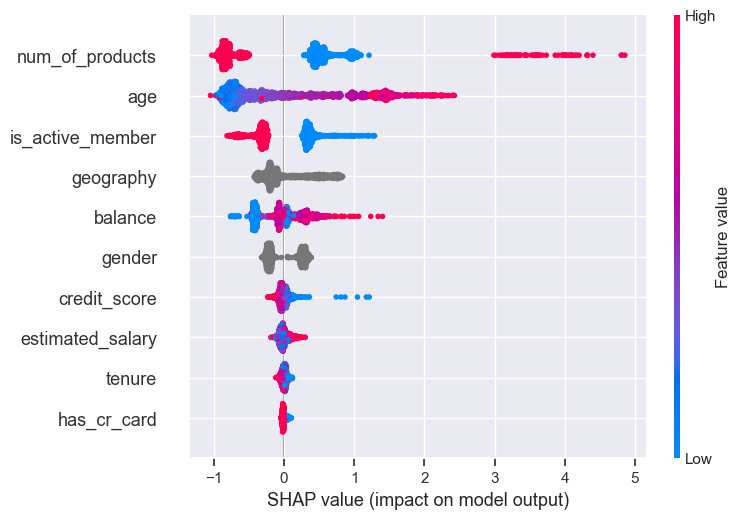

In [143]:
# начнем анализ с построения summary_plot

shap.summary_plot(shap_values, test[X])

# передаем ему shap_values и сами данные по фичам

**Видим, что модель предсказывает бОльший отток при:**

* больших значениях возраста.
* При бОльшем числе продуктов
* При бОльшем значении баланса

In [144]:
# В catboost можно понять какая фича для модели ВАЖНЕЕ ВСЕГО

model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,num_of_products,32.068621
1,age,23.642430
2,balance,11.617832
3,geography,10.759335
4,is_active_member,8.304126
5,credit_score,3.799094
6,estimated_salary,3.516682
7,gender,3.343100
8,tenure,2.180245
9,has_cr_card,0.768536


**Как видим, наибольшая важность у переменных num_of_products и age!**

# Сравнение результатов моделей

Выведем результаты моделей:

In [145]:
rating.sort_values(by='f1_cross_val', ascending=False)

,f1_cross_val,ROC_AUC_cross_val,f1_test
CatBoost,0.623001,NaN,0.727577
RandomForest_balanced,0.620424,0.857030,0.622066
RandomForest_SMOTE,0.600864,0.854098,0.605993
SVC_balanced,0.594872,0.849031,0.587891
SVC_SMOTE,0.586657,0.836822,0.594758
DecisionTree_SMOTE,0.583734,0.831973,0.557157
DecisionTree_balanced,0.553840,0.827703,0.553492
DecisionTree_before_balance,0.553453,0.817538,0.555882
LogRed_SMOTE,0.489512,0.765100,0.501748
KNN_SMOTE,0.488021,0.752786,0.485149


Как видим, лучший результат по f1_score на cross_val  показало CatBoost - 0.62. На втором месте расположился RandomForest_balanced с результатом 0.62. Что касается ROC-AUC, то лучший показатель на cross_val у RandomForest_balanced с 0.85.

# Выводы

В данной работе, на основании исторических данных о поведении клиентов и расторжении договоров с банком мы прогнозировали **уйдёт клиент из банка в ближайшее время или нет.**


Для этого был проведен исследовательский анализ данных, который выявил:

* Дисбаланс классов. Практически 80% принадлежат классу 0, и 20% принадлежат классу 1;
* фичи row_number, surname, CustomerID не сильно влияют на таргет
* Phik показал, что наибольшее влияние на таргет оказывает переменная num_of_products, age, is_active_member, balance, credit_score;
* Сильной корреляции между признаками нет, **проблема мультиколлинеарности отсутствует**

Строя модель без учета баланса (решающее дерево) - качество было хуже - 0.56 против 0.58. Строя другие модели, учитывая баланс классов с помощью oversampling SMOTE, удалось преодолеть порог в 0.59.  

Как видим, лучший результат по f1_score на test после кросс-валидации показало RandomForest - 0.612. На втором месте расположился CatBoost без сильной настройки с результатом 0.607. Что касается ROC-AUC, то лучший показатель на test у RandomForest с 0.77. Дерево решений без учете дисбаланса показывает результат хуже, чем с учетом!